# **Inicio del AB FINAL**

## **Preparacion de los datos**

En mi caso, he decidido crear este dataframe unificando todos los CSV en un único DataFrame y añadir una columna que identifique el origen (por ejemplo, source_id). Ya que la otra opción quer veia era crear un diccionario con cada csv separado, pero la custion es que las estructuras de columnas son muy parecidas y n po paraece que vaya a necesitar necesites tratamientos específicos por fichero, si no mas bien en conjunto.

Por ello, considero que es mas optima esta opción de unificar todos los datos en el mismo Dataframe

### Ruta de los *csv*

In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
cd drive

/content/drive


In [4]:
cd MyDrive

/content/drive/MyDrive


In [5]:
ls

'AB final Maths Pablo García Ollero  (1).pdf'
'AB final Maths Pablo García Ollero .pdf'
'AB-FINAL-Pablo-Garcia-Ollero (1).pdf'
 AB-FINAL-Pablo-Garcia-Ollero.pdf
 AB_FINAL_UNIT19_YoTeLoLlevo.zip
 Aprendizaje/
'Apuntes de clase.gdoc'
'Ayudas JuANJO'/
'Carta Romina (1).pdf'
'Carta Romina.pdf'
 Classroom/
'Colab Notebooks'/
'Comparación de ISO 56002 en Construverse Solutions y Prueba ISO 56002.gdoc'
'Construir en Silencio-VEED.mp4'
'Cosas Personales'/
 Dela/
'Diagrama, ejercicio 1.drawio'
'Diagrama sin título (1).drawio'
'Diagrama sin título (2).drawio'
'Diagrama sin título.drawio'
'Documento sin título (1).gdoc'
'Documento sin título (2).gdoc'
'Documento sin título.gdoc'
'Documento sin título.pdf'
'Estudio PVS CM 050825 (v7) 090925.docx'
'Excell contactos y dcc visitas.xlsx'
 Folleto.gdoc
'Foto Nicol Curriculum.jpg'
 Hightlights/
'Intermedia 1 - Gráfico de barras 1 (1).gsheet'
'Intermedia 1 - Gráfico de barras 1.gsheet'
'Intermedia 1 - Gráfico de columnas 1.gsheet'
'Intermedi

In [6]:
cd Aprendizaje

/content/drive/MyDrive/Aprendizaje


In [7]:
ls

'Cursos de Linkedin'/   Ebau/  'Lenguajes de programación'/  'MSMK University'/
 Docker/                IA/     MiAutoClicker.exe


In [8]:
cd MSMK University

/content/drive/MyDrive/Aprendizaje/MSMK University


In [9]:
cd 3 Año

/content/drive/MyDrive/Aprendizaje/MSMK University/3 Año


In [10]:
cd UNIT-26 Big DATA Analitics

/content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics


In [11]:
ls

'AB Final'/   Activities.csv   Apuntes.gdoc   poblacion.csv


In [12]:
cd AB Final

/content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final


In [13]:
pwd

'/content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final'

### **Función de ingerta de datos**

En este caso, tras invesigar, encontre la funcion ***glob***, la cual busca un patron en comun al cual comparar en una ruta especificada y a partir de ahi, extrae todas las rutas cojn dicho patron. Por ello, para insertar todos los csv, hare una función que busque archivos acabados en "*.csv*".

Además, haré un bucle con un for para recorrer y comprobar que se hayan descargado y leido los datos correctamente.

#### ***Merge de los csv***


Una vez ya nos hemos asegurado de que todos los csv estan preparados para juntarlos en el mismo Dataframe, toca juntarlos propiamente en el mismo Dataframe para trabajar a posteriori con ellos.

Además, como vimos en el resultado de la celda anterior, hay muchas columnas llamadas Unnamed, las cuales no tienen nada de información dentro, por lo que a la hora de crear el Dataframe, lo solucionare eliminando todas estas columnas que no necesitamos y solo ensucian el Dataframe.



>  # Resultados de la celda anterior
    AguaEmbalsada_RioCofio_LaAcena.csv
    Columnas:['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
    ---------------------------------------------------------------
    Archivo: AguaEmbalsada_RioGuadalix_Pedrezuela.csv
    Columnas: ['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']quote



Además, para la nueva columna para el Dataframe, he decidido que el contenido de dicha columna, en vez de ser la ruta de donde se han importados los datos, sea mejor directamente el nombre del embalse de donde se han sacado los datos. Esto, lo he hecho mediante la siguiente forma:



>   # Añadir columna con el nombre del archivo:
    nombre = Path(archivo).stem
    embalse = nombre.split("_")[-1]          
    df["embalse"] = embalse









#### **Comparacion de los csv**

Una vez que ya se que se han leido todos los csv correctamente, quiero comparar las columnas de los distintos *csv*, ya que para poder fusionar en un mismo Dataframe todos los datos, necesitamos asegurarnos de que se van a apilar correectamente y no se van a generear columnbas indeseadas por que ciertas columnas se llamen de forma distinta, como por ejemplo:  

*   La columna se llama ***Año***
*   La columna se llama ***Fecha***

Además, he estado teniendo un mismo error a la hora de leer los datos, ya que me salia que:


    UnicodeDecodeError                        Traceback (most recent call last)
    /tmp/ipython-input-2309794888.py in <cell line: 0>()
          5
          6 for archivo in CSVs:
    ----> 7   df_temp = pd.read_csv(archivo, nrows=0, sep=";")
          8   columnas_por_archivo[archivo.split("/")[-1]] = list(df_temp.columns)
          9

    5 frames
    parsers.pyx in pandas._libs.parsers.TextReader.__cinit__()

    parsers.pyx in pandas._libs.parsers.TextReader._get_header()

    parsers.pyx in pandas._libs.parsers.TextReader._tokenize_rows()

    parsers.pyx in pandas._libs.parsers.TextReader._check_tokenize_status()

    parsers.pyx in pandas._libs.parsers.raise_parser_error()

    /usr/lib/python3.12/codecs.py in decode(self, input, final)

    UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 8059: invalid continuation byte *texto en cursiva*




Esto indica que alguno de los CSV no está en *UTF-8*, sino probablemente en *Latin-1 (ISO-8859-1)*, cosa que al parecer es muy comun en ficheros Españoles, por lo que he metido un segundo intento de lectura con ***encoding="latin-1"*** si falla con ***UTF-8.***


#### **Función de Ingesta**

In [14]:
import pandas as pd
from pathlib import Path
import glob
import numpy as np
import re

from google.colab import files

In [15]:
ruta = "/content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/"
CSVs = glob.glob(ruta + "*.csv")

In [16]:
def cargar_df_embalses(CSVs):
    """
    Ejecuta exactamente los 3 scripts originales que cree para la ingesta de datos:
    1) Recorre y lista los CSV
    2) Inspecciona y compara columnas
    3) Lee, limpia y mergea en df_embalses (tabla 'a lo largo's)

    Devuelve df_embalses.
    """

    # -------- Script 1 --------
    # Bucle for para recorrer y ver si estan todos los csv
    for i, archivos in enumerate(CSVs):
      print ("Ruta número", i, archivos)

    # -------- Script 2 --------
    columnas_por_archivo = {}

    for archivo in CSVs:
        try:
            df_temp = pd.read_csv(archivo, nrows=0, sep=";", encoding="utf-8")
        except UnicodeDecodeError:
            df_temp = pd.read_csv(archivo, nrows=0, sep=";", encoding="latin-1")

        columnas_por_archivo[archivo.split("/")[-1]] = list(df_temp.columns)

    # Mostrar columnas de cada archivo
    for nombre, columnas in columnas_por_archivo.items():
        print("\nArchivo:", nombre)
        print("Columnas:", columnas)

    # Comparar todas las columnas con las del primer archivo
    referencia = list(columnas_por_archivo.values())[0]

    print("\n")
    print("Comparación con la referencia:")
    print("Archivo de referencia:", list(columnas_por_archivo.keys())[0])
    print("")

    for nombre, columnas in columnas_por_archivo.items():
        if columnas == referencia:
            print("✅", nombre, "tiene las mismas columnas")
        else:
            print("⚠️", nombre, "tiene columnas diferentes")
            print("Columnas diferentes:", set(columnas).symmetric_difference(set(referencia)))

    # -------- Script 3 --------
    lista_df = []
    columnas_referencia = None

    print("Iniciando merge de", len(CSVs), "archivos...")

    for archivo in CSVs:
        try:
            df = pd.read_csv(archivo, sep=";", encoding="utf-8")
        except UnicodeDecodeError:
            df = pd.read_csv(archivo, sep=";", encoding="latin-1")

        # Eliminar columnas basura tipo "Unnamed: X"
        df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

        # Añadir columna con el nombre del archivo
        nombre = Path(archivo).stem
        embalse = nombre.split("_")[-1]
        df["embalse"] = embalse

        # Registrar columnas de referencia del primer archivo
        if columnas_referencia is None:
            columnas_referencia = list(df.columns)
            print("Columnas de referencia:", columnas_referencia)

        lista_df.append(df)
        print("OK leído y preparado:", Path(archivo).name)

    # Concatenar todo (union de columnas; no reordena)
    df_embalses = pd.concat(lista_df, ignore_index=True, sort=False)

    print("\n")
    print("Merge completado.")
    print("Filas totales:", len(df_embalses))
    print("Columnas totales:", len(df_embalses.columns))
    print("Columnas finales:", list(df_embalses.columns))
    print("")

    return df_embalses


In [17]:
df_embalses = cargar_df_embalses(CSVs)

Ruta número 0 /content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/AguaEmbalsada_RioLozoya_PuentesViejas.csv
Ruta número 1 /content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/AguaEmbalsada_RioLozoya_LaPinilla.csv
Ruta número 2 /content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/AguaEmbalsada_RioGuadalix_Pedrezuela.csv
Ruta número 3 /content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/AguaEmbalsada_RioLozoya_ElVillar.csv
Ruta número 4 /content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/AguaEmbalsada_RioLozoya_ElAtazar.csv
Ruta número 5 /content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/AguaEmbalsada_RioManzanares_Navacerrada.csv
Ruta número 6 /content/drive/MyDrive/Aprendizaje/MSMK University/3 Año/UNIT-26 Big DATA Analitics/AB Final/AguaE

In [18]:
df_embalses

,anio,mes,hec_cub,embalse,"anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor","anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor,fecha,total","anio,mes,fecha,embalse,volumen,latitud,longitud"
0,1998,enero,"41,769",PuentesViejas,NaN,NaN,NaN
1,NaN,febrero,"41,442",PuentesViejas,NaN,NaN,NaN
2,NaN,marzo,"40,911",PuentesViejas,NaN,NaN,NaN
3,NaN,abril,"44,173",PuentesViejas,NaN,NaN,NaN
4,NaN,mayo,"50,395",PuentesViejas,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8535,NaN,NaN,NaN,long,NaN,NaN,"2020,11,2020-11-01,Valmayor,83.256,40.585,-4.0367"
8536,NaN,NaN,NaN,long,NaN,NaN,"2020,12,2020-12-01,Valmayor,96.598,40.585,-4.0367"
8537,NaN,NaN,NaN,long,NaN,NaN,"2021,1,2021-01-01,Valmayor,102.213,40.585,-4.0367"
8538,NaN,NaN,NaN,long,NaN,NaN,"2021,2,2021-02-01,Valmayor,117.166,40.585,-4.0367"


In [19]:
# De esta forma, usando el iloc, podemos ver si realmente estan mezclados bien los datos
print(df_embalses.iloc[1500:2003])

     anio         mes hec_cub      embalse  \
1500  NaN       julio    6,86  Navacerrada   
1501  NaN      agosto   4,937  Navacerrada   
1502  NaN  septiembre   3,156  Navacerrada   
1503  NaN     octubre   2,063  Navacerrada   
1504  NaN   noviembre   3,067  Navacerrada   
...   ...         ...     ...          ...   
1998  NaN       julio  63,662   Santillana   
1999  NaN      agosto   56,66   Santillana   
2000  NaN  septiembre   50,01   Santillana   
2001  NaN     octubre  44,242   Santillana   
2002  NaN   noviembre  40,183   Santillana   

     anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor  \
1500                                                NaN                                                                                                        
1501                                                NaN                                                                        

In [20]:
df_embalses.dtypes

,0
anio,object
mes,object
hec_cub,object
embalse,object
"anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor",object
"anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor,fecha,total",object
"anio,mes,fecha,embalse,volumen,latitud,longitud",object


## **Limpieza de la base de datos**

### Contexto

Una cosa a tener en cuenta, es que para este trabajo, pienso usar el algoritmo de prediccion de serie temporales Prophet, por lo cual mi base de datos deberá estar preferentemente para la facilidad del entrenamiento del algortimo en un estilo, en el que los embalses sea las columnas y sus datos se rellenen con las cantidades de agua medidas en cada mes y año.

### Limpieza técnica

#### Normalización de los meses con diccionario

Ahora, ya que debe estar en formato numerico, ya lo quiera pasar mas adelante a un tipo de dato Datetype, o no, el modelo lee solamente numeros, por lo cual, debo pasarlo de los meses ***"enero", "febrero", etc...*** a los nombres de los meses a formato numérico ***"01", "02"***...

In [21]:
# Diccionario de meses → número con padding de dos dígitos
mes_map = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "setiembre": "09",   # por seguridad
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12"
}

# Normalizamos y reemplazamos directamente la columna 'mes'
df_embalses["mes"] = (
    df_embalses["mes"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map(mes_map)
)

# Comprobación rápida
df_embalses["mes"].head(15)


,mes
0,01
1,02
2,03
3,04
4,05
5,06
6,07
7,08
8,09
9,10


#### Limpieza de columnas inecesarias

Una vez tengo la base de datos en este estado, he decidido extraer el actual estado de la base de datos ya que se pueden ver claramente ciertos aspectos raros n la base de datos como datos nulos, y aprovechando que trabajamos con una base de datos pequeña, importare la propia base de datos actual a un csv para poder visualizar de forma mas clara para ver si hay algún dato raro.

Añun asi, esto solo se puede hacer ya que es una base de datos relativamente pequeña. Por ello, también mostrare el como poder visualizar si hay ruido en el csv sin este método tan circunstancial y poco util para bases de dato más grandes.

In [22]:
# Guarda la versión actual del DataFrame
# df_embalses.to_csv("df_embalses_actual_2.0.csv", index=False, encoding="utf-8")

# files.download("df_embalses_actual_2.0.csv")


Aqúí como podemos ver, en el csv, hay datos raros los cuales mediante una breve investigación, llegue a la siguiente conclusión:


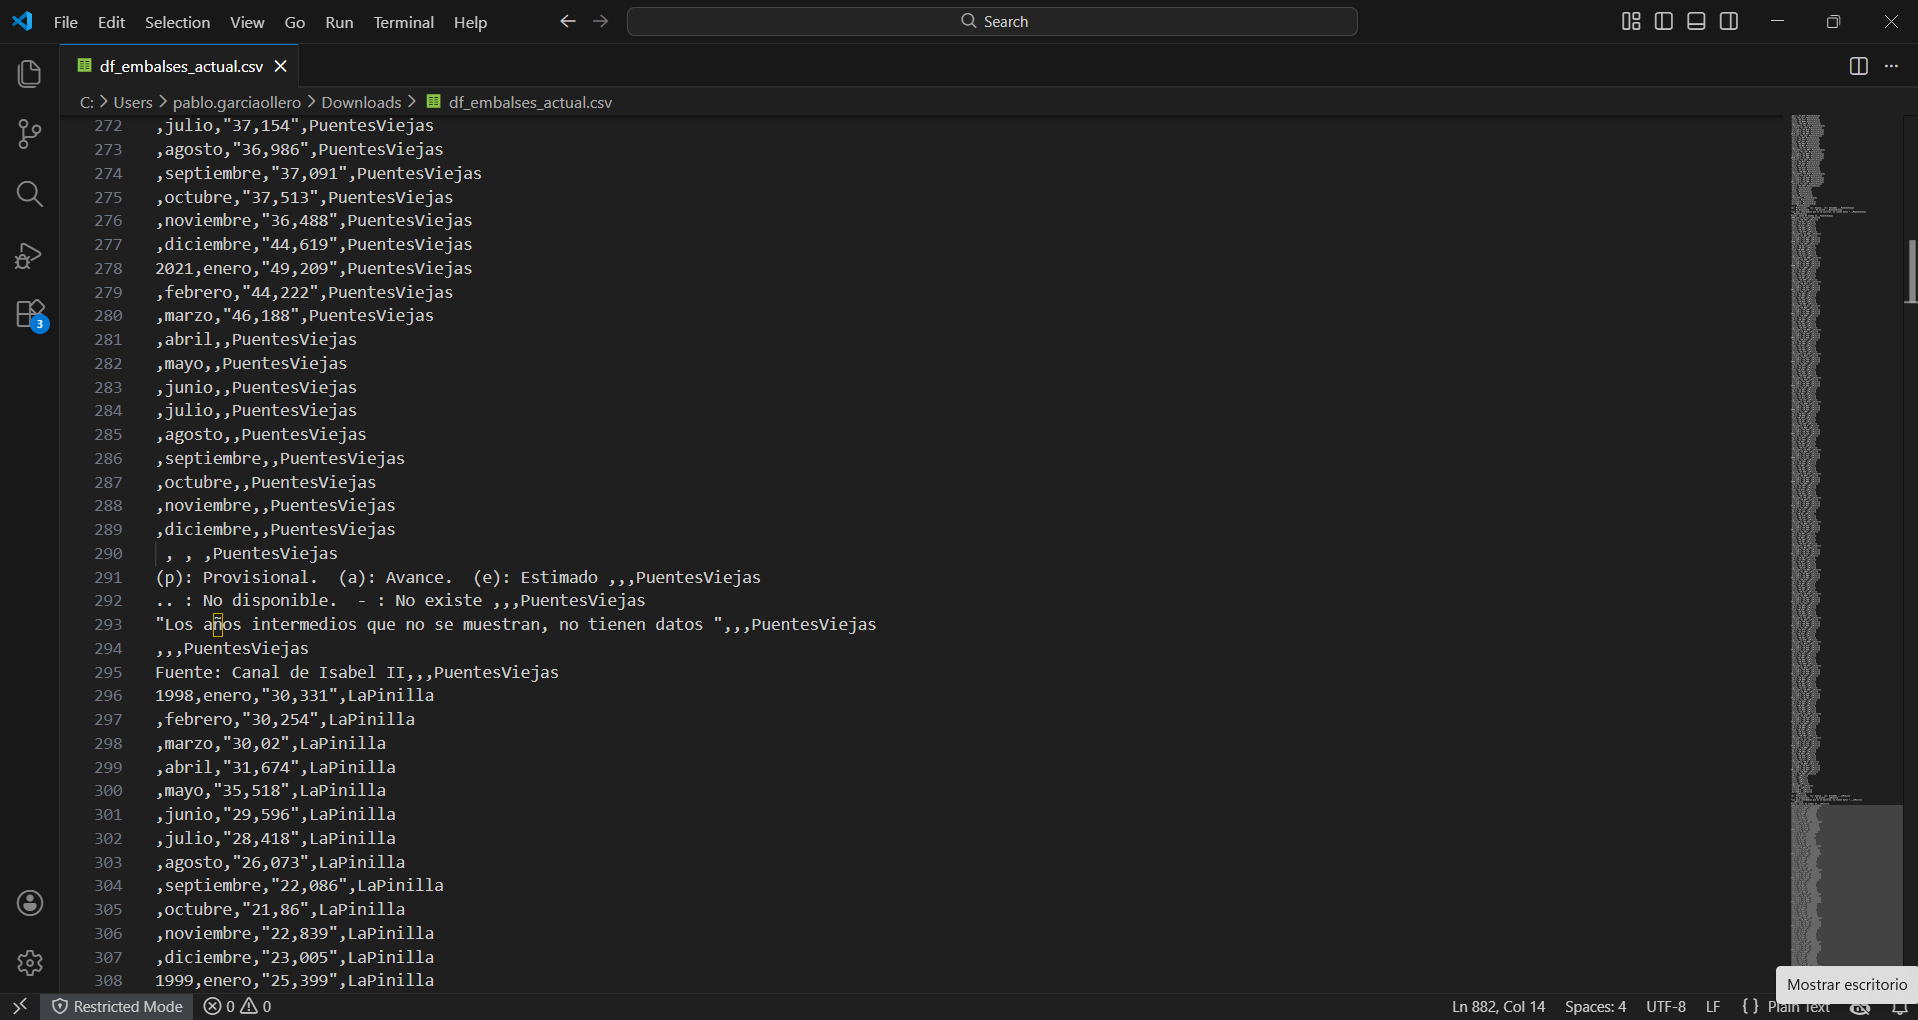

  **Mi CSV viene de un scraping o extracción de datos desde PDFs o HTML del Canal de Isabel II.**

    El problema es que los documentos del Canal incluyen:
    

*   Mensajes de nota: "Fuente: Canal de Isabel II"

*   Notas al pie: "(p): Provisional", "(a): Avance"

*   Textos de ayuda: "Los años intermedios…"

*   Filas con celdas vacías que el parser tradujo como ,, , (Valores Nan)

*   Valores que el OCR detectó como texto

*   Cabeceras entre años mezcladas con las filas

*   Columnas duplicadas como filas como las de ano, mes, hec_cub y embalse   (Debido probablemente al metodo usado de insertar los csv juntos)

Es decir, mi dataset no está limpio y contiene partes del documento original metidas dentro del CSV como si fueran filas, las cuales se traducen como ruido para el dataset.

Okay, soy consciente que esta mal la base de datos. Además, quiero pasar a tenerlos nombres de los embalses como columnas y la informacion de las filas sea directamente los hec_cub correspondientes por mes y año, pero llegar a ese punto primero quiero limpiar lo maximo posible la base de datos de valores nulos, y esos encabezados que no me sirven y solo me aportan ruido para la base de datos

Ahora el proximo paso, es realmente verificar que la mayor parte del data set tiene la estructura que esperamos, asi que primero hacemos un df_embalses(type) para ver que tipo de datos tenemos y luego pasamos un bucle que recorra cada fila para asegurar de que tengamos valores adecuados para empezar a transformar la base de datos. Por lo cual, lo que hare será:

Revisar cada fila del dataset y comprobamos si cumple la estructura esperada:

*  anio numérico o NaN

*  mes dentro de la lista de meses válidos

*  hec_cub con formato numérico tipo xx,xxx o xx.xxx

*  embalse con texto no vacío

Solo mantendré las filas que cumplen esas reglas y eliminaré todas las demás (texto basura, filas corruptas, notas, etc.).

Además, en el bucle añadire un metodo de verificacion con un contador para asegurarme de que se estan leyendo las filas corectamente una a una.



In [23]:
import numpy as np

# Paso 1: convertir todo a string y limpiar espacios
df_embalses["anio"] = df_embalses["anio"].astype(str).str.strip()

# Paso 2: reemplazar cadenas vacías o espacios por NaN
df_embalses["anio"] = df_embalses["anio"].replace({"": np.nan, " ": np.nan})

# Paso 3: quitar el ".0"
df_embalses["anio"] = df_embalses["anio"].str.replace(".0", "", regex=False)

# Paso 4: si aparece algo no numérico, convertirlo en NaN
df_embalses["anio"] = pd.to_numeric(df_embalses["anio"], errors="coerce")

# Paso 5: finalmente a Int64
df_embalses["anio"] = df_embalses["anio"].astype("Int64")

df_embalses["anio"].head(20)


,anio
0,1998
1,<NA>
2,<NA>
3,<NA>
4,<NA>
5,<NA>
6,<NA>
7,<NA>
8,<NA>
9,<NA>


Todos estos pasos son esenciales, ya que sorprendentemente hay datos irregulares, los cuales los años se introducen como un float escrito así: ***2006.0, 2011.0, 2015.0,*** etc, lo cual supone problemas a la hora de hacer posteriormente filtrospara eliminar filas inecesarias y el pivoteo de la tabla.

 Por ello, es mejor simplemente pasar todo como un ***string***, eliminar ***los .0*** y volver a pasar todo como un ***int***

In [24]:
print("Filas totales iniciales:", len(df_embalses))

# AHORA meses_validos tienen que ser los códigos "01".."12"
meses_validos = {f"{i:02d}" for i in range(1, 13)}  # {"01","02",...,"12"}

patron_hec = re.compile(r"^\d+([,.]\d+)?$")

contador = {"n": 0}

def fila_valida(fila):
    contador["n"] += 1

    anio = fila["anio"]
    mes = str(fila["mes"]).strip()      # ya viene como "01".."12", no hace falta lower()
    hec = str(fila["hec_cub"]).strip()
    embalse = str(fila["embalse"]).strip()

    # 1) Validar año
    if (not pd.isna(anio)) and (not str(anio).isdigit()):
        return False

    # 2) Validar mes: ahora comprobamos contra {"01","02",...,"12"}
    if mes not in meses_validos:
        return False

    # 3) Validar formato hec_cub
    if not patron_hec.match(hec):
        return False

    # 4) Validar embalse
    if len(embalse) < 2:
        return False

    return True

columnas_buenas = ["anio", "mes", "hec_cub", "embalse"]
df_embalses = df_embalses[columnas_buenas].copy()

mask_validas = df_embalses.apply(fila_valida, axis=1)

print("Filas evaluadas por fila_valida:", contador["n"])
print("Filas válidas:", mask_validas.sum())
print("Filas NO válidas (eliminadas):", (~mask_validas).sum())

filas_rechazadas = df_embalses[~mask_validas].head(10)
display(filas_rechazadas)

df_embalses = df_embalses[mask_validas].reset_index(drop=True)

print("\nFilas finales tras limpiar:", len(df_embalses))
df_embalses.head(10)


Filas totales iniciales: 8540
Filas evaluadas por fila_valida: 8540
Filas válidas: 3876
Filas NO válidas (eliminadas): 4664


,anio,mes,hec_cub,embalse
279,<NA>,04,NaN,PuentesViejas
280,<NA>,05,NaN,PuentesViejas
281,<NA>,06,NaN,PuentesViejas
282,<NA>,07,NaN,PuentesViejas
283,<NA>,08,NaN,PuentesViejas
284,<NA>,09,NaN,PuentesViejas
285,<NA>,10,NaN,PuentesViejas
286,<NA>,11,NaN,PuentesViejas
287,<NA>,12,NaN,PuentesViejas
288,<NA>,NaN,,PuentesViejas



Filas finales tras limpiar: 3876


,anio,mes,hec_cub,embalse
0,1998,01,"41,769",PuentesViejas
1,<NA>,02,"41,442",PuentesViejas
2,<NA>,03,"40,911",PuentesViejas
3,<NA>,04,"44,173",PuentesViejas
4,<NA>,05,"50,395",PuentesViejas
5,<NA>,06,"43,927",PuentesViejas
6,<NA>,07,"43,706",PuentesViejas
7,<NA>,08,"43,051",PuentesViejas
8,<NA>,09,"42,358",PuentesViejas
9,<NA>,10,"34,594",PuentesViejas


In [25]:
# Guarda la versión actual del DataFrame
# df_embalses.to_csv("df_embalses_medio_limpio_7.csv", index=False, encoding="utf-8")

# files.download("df_embalses_medio_limpio_7.csv")

Ahora, para comprobar, en mi caso, aunque ya he podido comprobar de que el estado de la base de datos ha mejorado, quiero asegurarme de que los comentarios que mencionaba antes que estorbaban en la base de datos, ya no esten. Por ello, como segunda forma de asegurarme, voy a volover a descargar el csv, y comprobarlo.

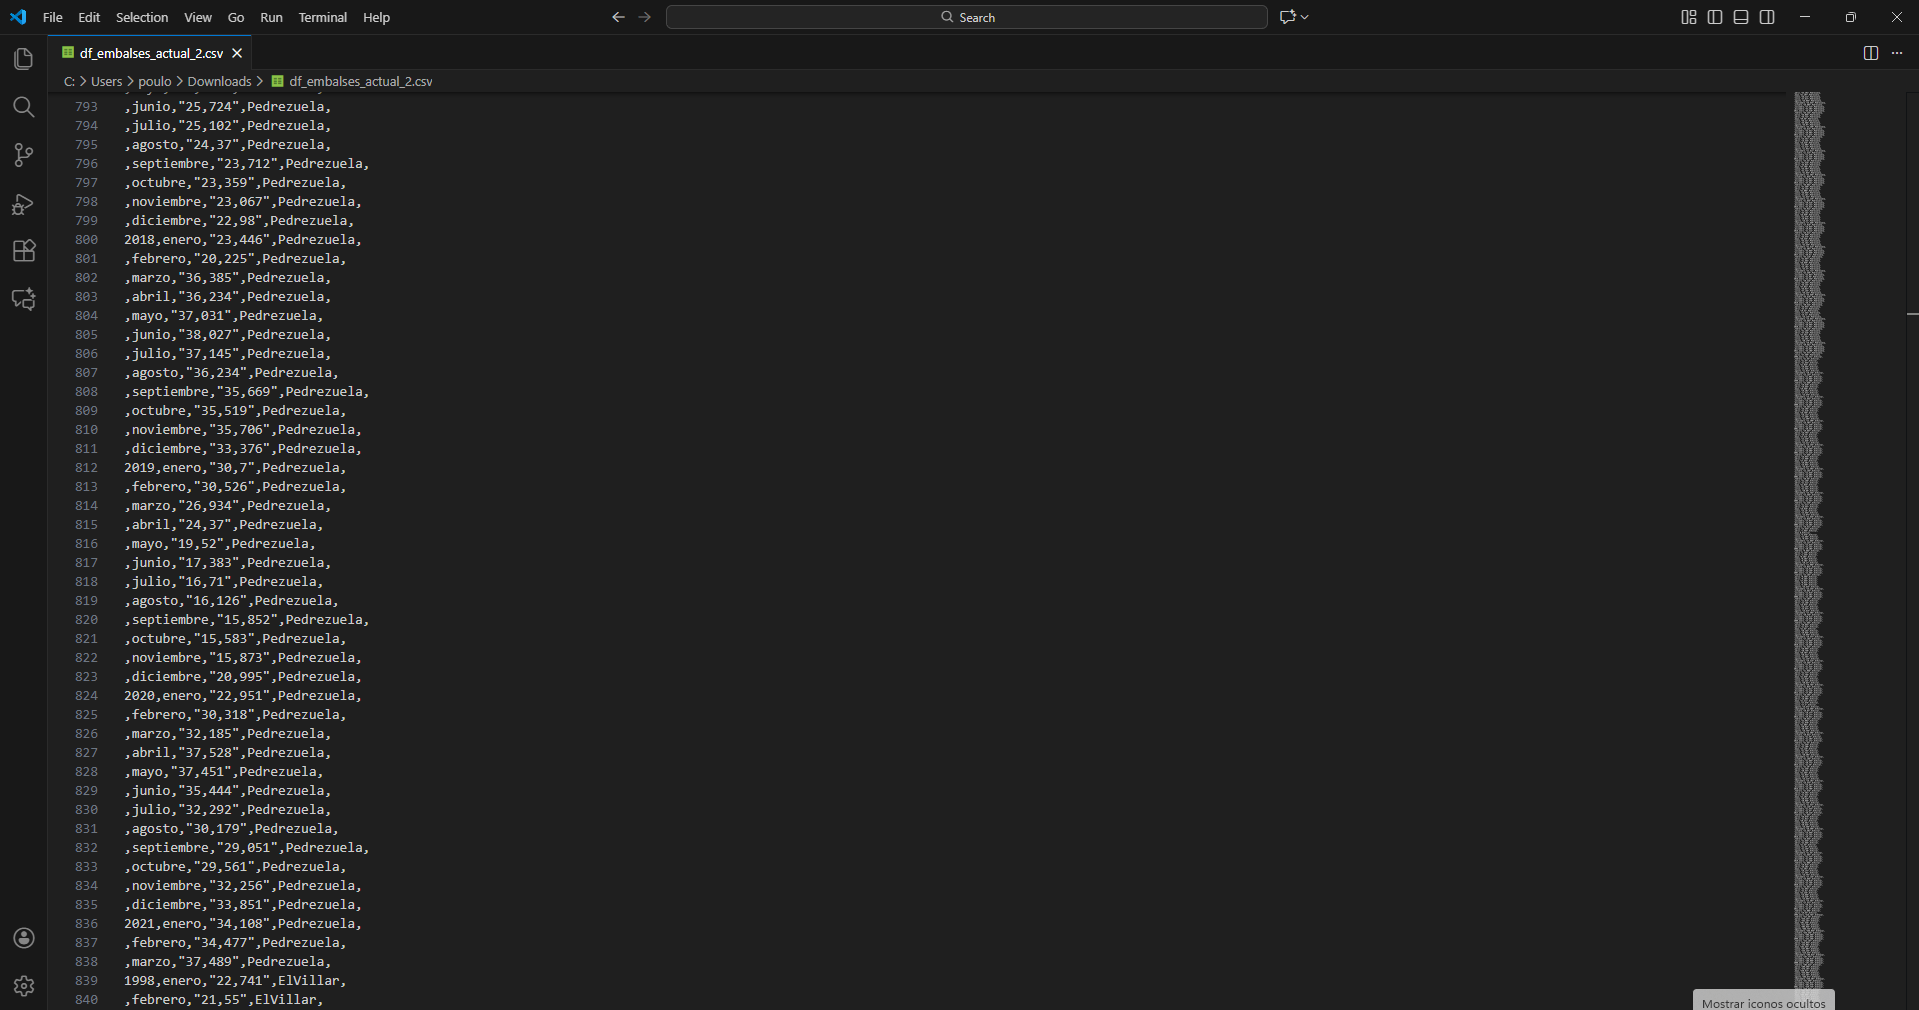


Y tal, como esperaba, estos comentarios ya no estan.

In [26]:
df_embalses

,anio,mes,hec_cub,embalse
0,1998,01,"41,769",PuentesViejas
1,<NA>,02,"41,442",PuentesViejas
2,<NA>,03,"40,911",PuentesViejas
3,<NA>,04,"44,173",PuentesViejas
4,<NA>,05,"50,395",PuentesViejas
...,...,...,...,...
3871,<NA>,11,"0,307",Navalmedio
3872,<NA>,12,"0,321",Navalmedio
3873,2021,01,"0,384",Navalmedio
3874,<NA>,02,"0,351",Navalmedio


#### **Conversión Correcta de hec_cub**

Los valores vienen como texto ***("41,769", "44", "72,05")***, y yo necesito convertirlos a ***float REALES***, usando punto decimal, manteniendo la coma como decimal.


In [27]:
# Convertimos coma decimal (ej: "41,769") a punto decimal ("41.769")
df_embalses["hec_cub"] = (
    df_embalses["hec_cub"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
)

# Convertimos definitivamente a float
df_embalses["hec_cub"] = pd.to_numeric(df_embalses["hec_cub"], errors="coerce")

# Comprobamos que funciona
df_embalses["hec_cub"].describe()


,hec_cub
count,3876.000000
mean,47.720440
std,80.207739
min,0.000000
25%,6.232750
50%,22.324000
75%,44.131000
max,423.885000


In [28]:
df_embalses.iloc[2579: 2600]

,anio,mes,hec_cub,embalse
2579,<NA>,09,9.135,LaAcena
2580,<NA>,10,9.976,LaAcena
2581,<NA>,11,14.840,LaAcena
2582,<NA>,12,22.687,LaAcena
2583,2004,01,23.298,LaAcena
2584,<NA>,02,23.519,LaAcena
2585,<NA>,03,23.562,LaAcena
2586,<NA>,04,23.371,LaAcena
2587,<NA>,05,23.710,LaAcena
2588,<NA>,06,22.363,LaAcena


#### **Forward-fill del año**

Muchos años, vienen así,


```
1998, enero, ...
NaN, febrero, ...
NaN, marzo, ...

```

Y el foward Fill, rellenara esos Nan, con el año correcto, cogiendo el anterior disponible y duplicandolo, haciendo que se vea de la siguinte forma:

```
1998, enero, ...
1998, febrero, ...
1998, marzo, ...

```



In [29]:
# Rellenamos los NaN del año copiando el valor anterior
df_embalses["anio"] = df_embalses["anio"].ffill()

# Convertimos años a integer
df_embalses["anio"] = df_embalses["anio"].astype(int)

df_embalses.head(20)


,anio,mes,hec_cub,embalse
0,1998,01,41.769,PuentesViejas
1,1998,02,41.442,PuentesViejas
2,1998,03,40.911,PuentesViejas
3,1998,04,44.173,PuentesViejas
4,1998,05,50.395,PuentesViejas
5,1998,06,43.927,PuentesViejas
6,1998,07,43.706,PuentesViejas
7,1998,08,43.051,PuentesViejas
8,1998,09,42.358,PuentesViejas
9,1998,10,34.594,PuentesViejas


In [30]:
df_embalses.iloc[2579: 2600]

,anio,mes,hec_cub,embalse
2579,2003,09,9.135,LaAcena
2580,2003,10,9.976,LaAcena
2581,2003,11,14.840,LaAcena
2582,2003,12,22.687,LaAcena
2583,2004,01,23.298,LaAcena
2584,2004,02,23.519,LaAcena
2585,2004,03,23.562,LaAcena
2586,2004,04,23.371,LaAcena
2587,2004,05,23.710,LaAcena
2588,2004,06,22.363,LaAcena


#### **Pivotación de la tabla**

Ahora, para que el algoritmo de prediccion de series temporales, le sea mas facil de entnder lso datos, se debe pivotar la tabla, para que en vez de tener columnas donde los datos de la cantidad de agua recogida se vean en la columna hect_cub, queremos que cada embalse, tenga sus propias medidas por mes y año, por lo que debemos hacer una columna por cada embalse. Es decir, transformar el Data Base, de formato ancho:

```
anio | mes | embalse | hec_cub

```

A formato largo:


```
anio | mes | PuentesViejas | ElAtazar | Navalmedio | ...

```





In [31]:
sorted(df_embalses["embalse"].unique())


['ElAtazar',
 'ElVado',
 'ElVillar',
 'LaAcena',
 'LaJorosa',
 'LaPinilla',
 'LosMorales',
 'Navacerrada',
 'Navalmedio',
 'Pedrezuela',
 'PuentesViejas',
 'Riosequillo',
 'Santillana',
 'Valmayor']

In [32]:
# 1) Pivot simple, sin rejilla
df_pivotada = df_embalses.pivot_table(
    index=["anio", "mes"],
    columns="embalse",
    values="hec_cub",
    aggfunc="mean"
).reset_index()

# 2) Ver cuántos valores tiene LaAcena en el pivot
print("Filas con datos en LaAcena (pivot):",
      df_pivotada["LaAcena"].notna().sum())

# 3) Ver algunas filas donde sí hay datos
# Esta lina esta mostrada de esta forma ya que tuve varios problemas por los cuales se me me perdian datos al pivotar la tabla.
# Finalemnete encontre el error, ya que habia algunos datos de años que no se pasaban bien, en la transformacion mas arriba.
# Esto, hacia que perdiera las filas con los años de alguno embalses, lo cual resultaba a la hora de hacer el pivot, que los  datos se perdian.
df_pivotada[df_pivotada["LaAcena"].notna()].head(15)


Filas con datos en LaAcena (pivot): 279


embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
0,1998,01,326.784,45.882,22.741,23.891,6.572,30.331,2.373,10.062,0.182,38.413,41.769,45.782,76.953,118.990
1,1998,02,327.590,46.043,21.550,23.816,6.462,30.254,2.370,10.114,0.617,38.104,41.442,46.640,78.440,119.578
2,1998,03,336.267,39.928,21.670,23.245,6.848,30.020,2.363,9.966,0.500,33.449,40.911,45.965,78.067,119.063
3,1998,04,353.267,42.443,21.644,23.350,6.747,31.674,2.363,10.326,0.639,27.848,44.173,46.209,82.716,119.578
4,1998,05,391.448,49.165,21.925,23.678,7.041,35.518,2.338,10.989,0.625,23.009,50.395,43.954,85.453,120.833
5,1998,06,412.483,41.751,19.654,21.947,6.718,29.596,2.326,9.647,0.559,21.130,43.927,41.359,78.627,109.389
6,1998,07,405.935,24.442,12.448,18.924,6.072,28.418,2.212,7.982,0.643,14.083,43.706,43.338,77.602,95.295
7,1998,08,388.735,13.855,11.913,15.802,5.530,26.073,2.047,6.183,0.584,13.737,43.051,37.611,76.400,86.685
8,1998,09,366.046,8.980,10.276,13.085,5.881,22.086,0.984,5.051,0.336,12.905,42.358,34.818,76.216,81.990
9,1998,10,336.358,13.340,13.147,11.208,6.006,21.860,1.855,4.348,0.191,10.461,34.594,35.689,76.307,78.129


In [33]:
df_pivotada


embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
0,1998,01,326.784,45.882,22.741,23.891,6.572,30.331,2.373,10.062,0.182,38.413,41.769,45.782,76.953,118.990
1,1998,02,327.590,46.043,21.550,23.816,6.462,30.254,2.370,10.114,0.617,38.104,41.442,46.640,78.440,119.578
2,1998,03,336.267,39.928,21.670,23.245,6.848,30.020,2.363,9.966,0.500,33.449,40.911,45.965,78.067,119.063
3,1998,04,353.267,42.443,21.644,23.350,6.747,31.674,2.363,10.326,0.639,27.848,44.173,46.209,82.716,119.578
4,1998,05,391.448,49.165,21.925,23.678,7.041,35.518,2.338,10.989,0.625,23.009,50.395,43.954,85.453,120.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020,11,322.594,26.556,20.421,15.596,4.354,22.477,NaN,5.469,0.307,32.256,36.488,35.890,72.051,83.256
275,2020,12,328.937,45.859,21.617,19.546,5.248,28.493,NaN,8.305,0.321,33.851,44.619,38.857,80.703,96.598
276,2021,01,332.906,48.117,23.600,23.477,5.805,29.557,NaN,8.811,0.384,34.108,49.209,43.689,84.763,102.213
277,2021,02,331.279,45.471,22.006,23.414,6.134,28.946,NaN,8.859,0.351,34.477,44.222,47.479,82.427,117.166


In [34]:
df_pivotada.iloc[139: 144]

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
139,2009,08,359.636,10.070,19.946,12.909,5.053,26.108,0.493,4.808,0.384,19.606,2.954,39.532,56.187,84.423
140,2009,09,332.453,7.547,19.477,12.297,3.725,23.238,0.373,4.102,0.380,19.277,2.178,36.627,49.276,74.411
141,2009,10,310.221,7.416,17.183,10.037,4.200,20.687,0.307,3.405,0.393,19.177,1.955,34.671,44.723,64.380
142,2009,11,294.343,7.455,12.885,9.670,3.404,18.985,0.272,3.286,0.419,18.781,8.380,30.187,39.541,63.072
143,2009,12,280.180,16.164,13.036,9.598,2.812,24.048,0.264,4.031,0.406,16.211,20.636,20.719,42.281,66.681


In [35]:
# Pon aquí el DataFrame que quieres descargar:
# df_pivotada.to_csv("datos_exportados.csv", index=False, encoding="utf-8")

# Descargar al ordenador
# files.download("datos_exportados.csv")


Como podemos ver, ahoramismo ya esta bien preparado eldataset, pero, sin embargo como podemos ver, al embalse de LosMorales, le faltan datos desde 2020, por lo que mediante la siguiente linea de comando, podremos ver la primera fila completa donde aparece un NaN. Para así, saber hasta que fecha tenemos datos.

```
primer_nan = df_pivotada["LosMorales"].isna().idxmax()
primer_nan

```



In [36]:
primer_nan = df_pivotada["LosMorales"].isna().idxmax()
primer_nan
print("\n En esta línea deja de haber datos para el embalse LosMorales =", primer_nan, "\n")



 En esta línea deja de haber datos para el embalse LosMorales = 249 



In [37]:
# Imprimo solo para asegurarme de que es a partir de es punto que dejo de tener los datos
df_pivotada.iloc[245: 274]

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
245,2018,06,417.207,44.364,21.550,21.461,6.012,29.404,1.839,8.746,0.340,38.027,46.472,38.456,87.147,103.525
246,2018,07,411.022,30.972,21.258,19.526,4.898,27.048,1.727,7.705,0.387,37.145,42.907,35.239,79.096,103.394
247,2018,08,387.134,22.872,21.590,16.126,4.990,23.980,1.666,6.784,0.366,36.234,43.196,36.244,71.606,103.459
248,2018,09,361.351,17.826,21.550,13.623,4.721,21.158,1.617,6.099,0.357,35.669,43.317,37.428,66.030,103.262
249,2018,10,337.544,16.783,21.564,11.748,4.471,19.313,NaN,5.572,0.352,35.519,41.372,38.429,61.997,105.117
250,2018,11,326.337,26.099,21.737,12.869,4.656,26.938,NaN,6.853,0.335,35.706,44.074,38.589,68.616,106.257
251,2018,12,321.352,33.782,21.858,13.672,4.078,26.757,NaN,6.586,0.317,33.376,41.489,38.164,68.616,102.802
252,2019,01,320.998,35.470,21.258,13.222,4.057,26.395,NaN,5.844,0.371,30.700,40.047,37.533,67.317,98.357
253,2019,02,324.373,40.473,21.008,13.109,4.100,25.293,NaN,5.964,0.342,30.526,44.123,42.296,70.015,98.674
254,2019,03,330.827,31.325,19.015,12.166,3.589,28.305,NaN,5.621,0.305,26.934,41.980,41.585,71.339,97.663


Sabiendo, que es en la linea 249 donde dejamos de tener datos para este Embalse, ahora simplemente restando las 278 lineas que tenemos a estas 249, vemos como hay 29 filas en las que no contamos con datos para todos los embalses.

#### Relleno de datos

Para ello, ahora hare una funcion la cual se encargue de coger la media por fecha de los últimos 3 años, para rellenar los datos faltantes con una aproximación optima.

In [38]:
import numpy as np
import pandas as pd

def rellenar_losmorales_historico():
    """
    Rellena SOLO los NaN del embalse LosMorales en df_pivotada
    usando un patrón histórico realista:
      1) Media de los últimos 3 años para ese mismo mes.
      2) Si no hay suficientes datos, media histórica de ese mes.
      3) Si tampoco hay, media global del embalse.
    Crea df_pivotada_rellena como copia modificada.
    """

    global df_pivotada

    df = df_pivotada.copy()

    # Asegurar tipos correctos
    df["anio"] = pd.to_numeric(df["anio"], errors="coerce").astype("Int64")
    df["mes"]  = pd.to_numeric(df["mes"],  errors="coerce").astype("Int64")

    embalse = "LosMorales"

    if embalse not in df.columns:
        print(f"⚠ La columna {embalse} no existe en df_pivotada.")
        return

    # NaN antes
    nan_antes = df[embalse].isna().sum()
    print(f"NaN en {embalse} ANTES de imputar: {nan_antes}")

    # Filas con NaN en LosMorales
    mask_nan = df[embalse].isna()
    filas_nan = df[mask_nan][["anio", "mes"]].copy().reset_index()

    if filas_nan.empty:
        print(f"✔ No hay NaN en {embalse}, no se modifica nada.")
        globals()["df_pivotada_rellena"] = df
        return

    # Datos válidos de LosMorales
    datos_validos = df[df[embalse].notna()]
    if datos_validos.empty:
        print(f"⚠ {embalse} no tiene datos válidos, no se puede imputar.")
        globals()["df_pivotada_rellena"] = df
        return

    # medias de fallback
    media_por_mes = datos_validos.groupby("mes")[embalse].mean().to_dict()
    media_global  = datos_validos[embalse].mean()

    # Rellenar cada NaN
    for _, row in filas_nan.iterrows():
        idx = row["index"]
        anio_f = row["anio"]
        mes_f  = row["mes"]

        # últimos 3 años para ese mes
        mask_rec = (
            (df["anio"] >= anio_f - 3) &
            (df["anio"] <  anio_f) &
            (df["mes"] == mes_f) &
            (df[embalse].notna())
        )
        candidatos = df.loc[mask_rec, embalse]

        if not candidatos.empty:
            val = candidatos.mean()
        elif mes_f in media_por_mes:
            val = media_por_mes[mes_f]
        else:
            val = media_global

        df.at[idx, embalse] = val

    nan_despues = df[embalse].isna().sum()
    print(f"NaN en {embalse} DESPUÉS de imputar: {nan_despues}")

    globals()["df_pivotada_rellena"] = df
    print("✔ df_pivotada_rellena creado (solo LosMorales modificado).")


In [39]:
rellenar_losmorales_historico()


NaN en LosMorales ANTES de imputar: 30
NaN en LosMorales DESPUÉS de imputar: 0
✔ df_pivotada_rellena creado (solo LosMorales modificado).


In [40]:
df_pivotada_rellena

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
0,1998,1,326.784,45.882,22.741,23.891,6.572,30.331,2.373000,10.062,0.182,38.413,41.769,45.782,76.953,118.990
1,1998,2,327.590,46.043,21.550,23.816,6.462,30.254,2.370000,10.114,0.617,38.104,41.442,46.640,78.440,119.578
2,1998,3,336.267,39.928,21.670,23.245,6.848,30.020,2.363000,9.966,0.500,33.449,40.911,45.965,78.067,119.063
3,1998,4,353.267,42.443,21.644,23.350,6.747,31.674,2.363000,10.326,0.639,27.848,44.173,46.209,82.716,119.578
4,1998,5,391.448,49.165,21.925,23.678,7.041,35.518,2.338000,10.989,0.625,23.009,50.395,43.954,85.453,120.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020,11,322.594,26.556,20.421,15.596,4.354,22.477,0.898778,5.469,0.307,32.256,36.488,35.890,72.051,83.256
275,2020,12,328.937,45.859,21.617,19.546,5.248,28.493,0.828556,8.305,0.321,33.851,44.619,38.857,80.703,96.598
276,2021,1,332.906,48.117,23.600,23.477,5.805,29.557,0.825259,8.811,0.384,34.108,49.209,43.689,84.763,102.213
277,2021,2,331.279,45.471,22.006,23.414,6.134,28.946,0.945630,8.859,0.351,34.477,44.222,47.479,82.427,117.166


# **Visualización de datos**

### Gráficas del dataset

#### Preparación previa

**Creacion de la columna fecha y total para el Algoritmo de Prophet y otras gráficas**

Es necesario tener una columna con un estilo DateType, apra este algritmo de predicción de series temporales, por lo cual, ahroa que teneos la Data Base limpia, solo tendremos que coger las columnas de *"anio"* y *"mes"* y juntarlas para hecer esta columna nueva.

Al igua que la columna fecha, la columna total, sera muy necesaria no solo para el **Algoritmo Prophet**, si no tambien para las gráficas para entender mejor el Data Set, obtenidas gracias al propio Data Set.


***IMPORTANTE:***

En este caso, como no tenemos dia concreto del mes, simplemente se pondra que en todas las fechas hablamos del día 1 de cada mes

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Crea la fecha para el DataSet
df_pivotada_rellena["fecha"] = pd.to_datetime(
    df_pivotada_rellena["anio"].astype(str) + "-" + df_pivotada["mes"] + "-01"
)

# Columnas de embalses = todas menos anio, mes, fecha
columnas_embalses = [c for c in df_pivotada.columns if c not in ["anio", "mes", "fecha"]]

# Suma total de agua embalsada al mes
df_pivotada_rellena["total"] = df_pivotada[columnas_embalses].sum(axis=1)

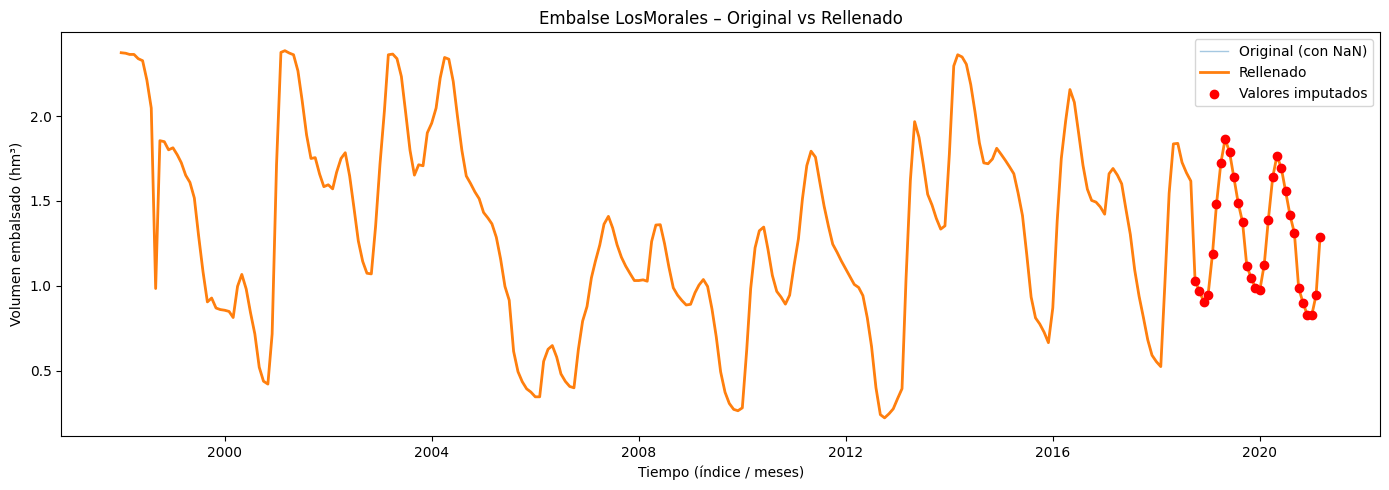

In [43]:

# Más cómodo si tienes columna fecha, pero si no, usamos el índice
x = df_pivotada.index

# Máscara de dónde había NaN originalmente
mask_imputado = df_pivotada["LosMorales"].isna()

plt.figure(figsize=(14, 5))

# Serie original (con huecos)
plt.plot(
    df_pivotada_rellena["fecha"],
    df_pivotada["LosMorales"],
    label="Original (con NaN)",
    alpha=0.4,
    linewidth=1
)

# Serie rellenada
plt.plot(
    df_pivotada_rellena["fecha"],
    df_pivotada_rellena["LosMorales"],
    label="Rellenado",
    linewidth=2
)

# Marcar solo los puntos imputados
plt.scatter(
    df_pivotada_rellena["fecha"][mask_imputado],
    df_pivotada_rellena.loc[mask_imputado, "LosMorales"],
    color="red",
    zorder=5,
    label="Valores imputados"
)

plt.title("Embalse LosMorales – Original vs Rellenado")
plt.xlabel("Tiempo (índice / meses)")
plt.ylabel("Volumen embalsado (hm³)")
plt.legend()
plt.tight_layout()
plt.show()



#### Gráficos ilustrativos

***Gráfico de barras por AÑO de TODOS los embalses***

Gracias a este gráfico, podeos responder a preguntas como: ¿Cuánta agua total hubo cada año en todos los embalses sumados?

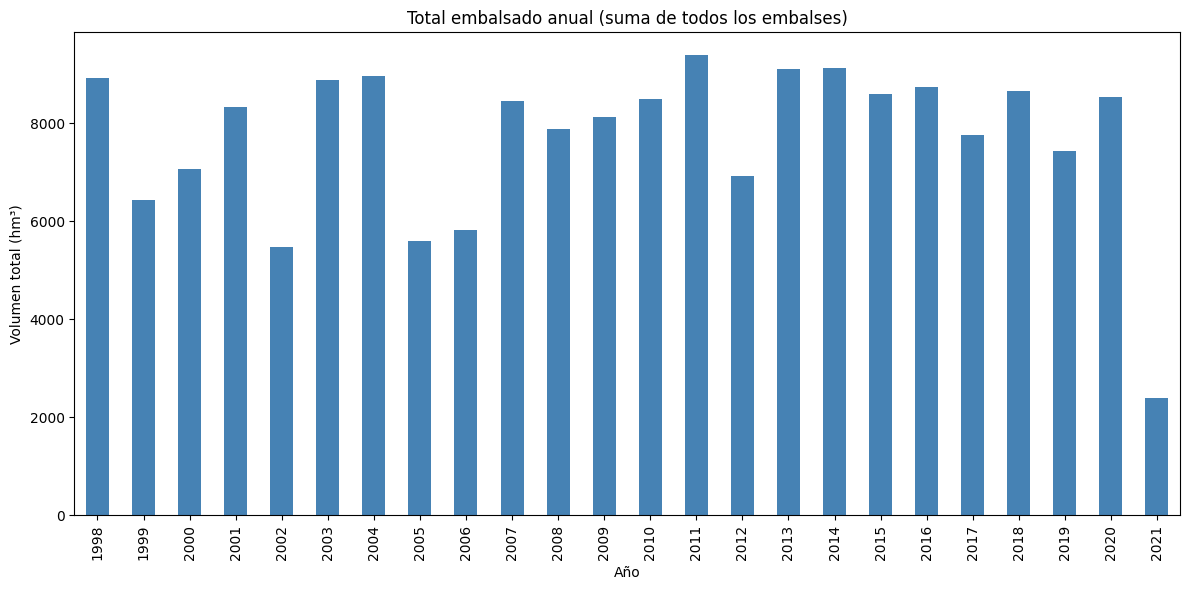

In [44]:
df_anual = df_pivotada_rellena.groupby("anio")[columnas_embalses].sum()

plt.figure(figsize=(12, 6))
df_anual.sum(axis=1).plot(kind="bar", color="steelblue")

plt.title("Total embalsado anual (suma de todos los embalses)")
plt.xlabel("Año")
plt.ylabel("Volumen total (hm³)")
plt.tight_layout()
plt.show()


Hya que tener en cuenta, que como hemos visto antes en el Data Set, tenemos ciertos embalses lso cuales no tienen datos sobre 2021, como LosMorales, por lo cual no es raro el ver estos datos. Además, hay que recordar que para 2021, solo tenemos datos hasta Marzo, por lo cual nos quedaría por añadir todavía 9 meses de datos, para completar esta barra.

  Aun así, como conclusión, se puede ver como ciclicamente cada año aumenta y disminuye el volumen total, pero a su vez, aumenta generalmente el minimo de agua acumulada.

***Gráfico de barras por AÑO de cada embalse (cada embalse una barra por año)***

Este gráfico, es muy util en general para poder comparar embalses. Ya que puede uno, simplemente comparar dos embalses por sus niveles de aga a lo largo del tiempo. Esto sería muy util, si quisieramos agregar una columna de Localidad/Comunidad autonoma/Localización, para poder identificar que embalses tienen mayor y menor acumulación de agua y en que zona geograficas están situados.

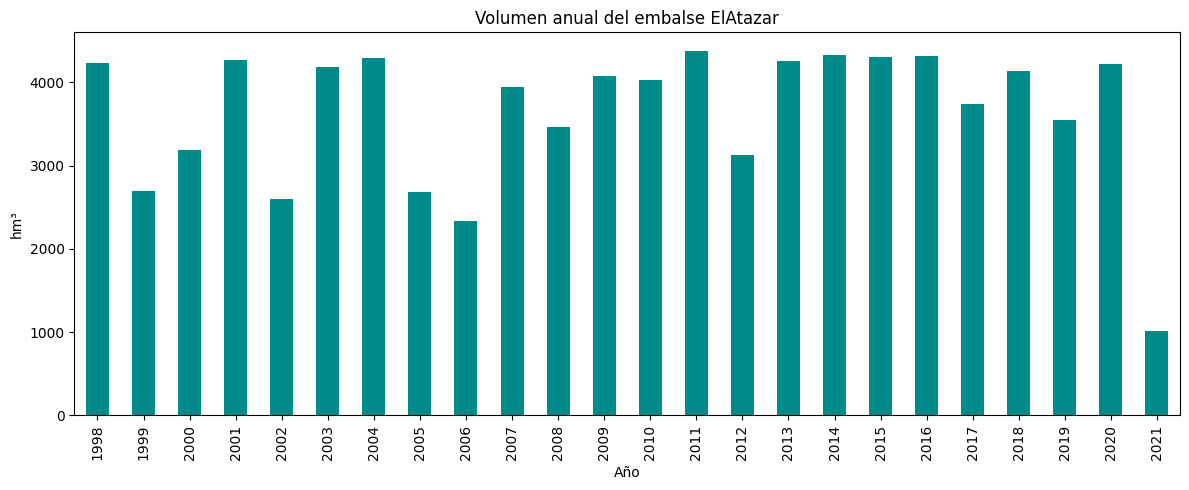

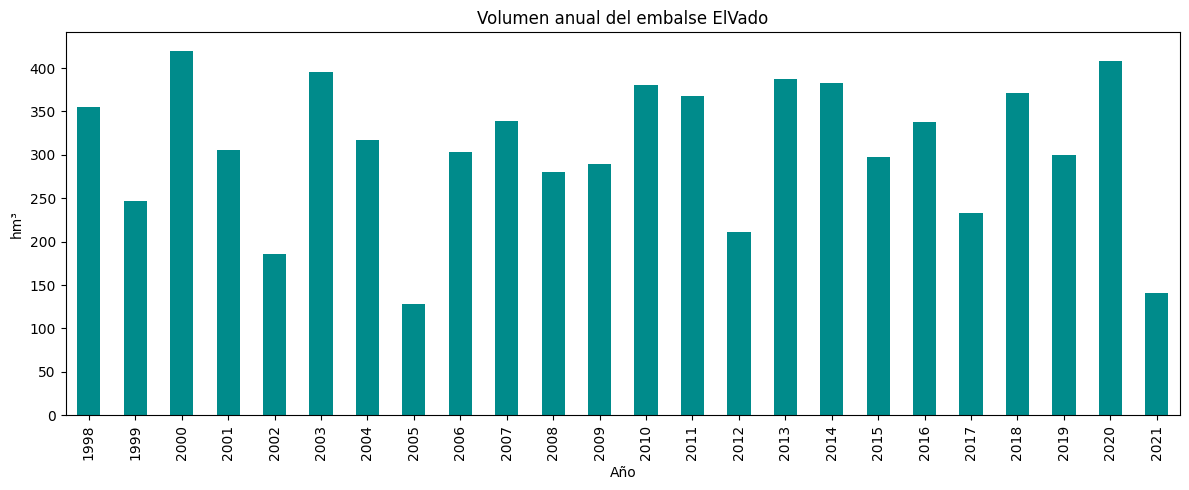

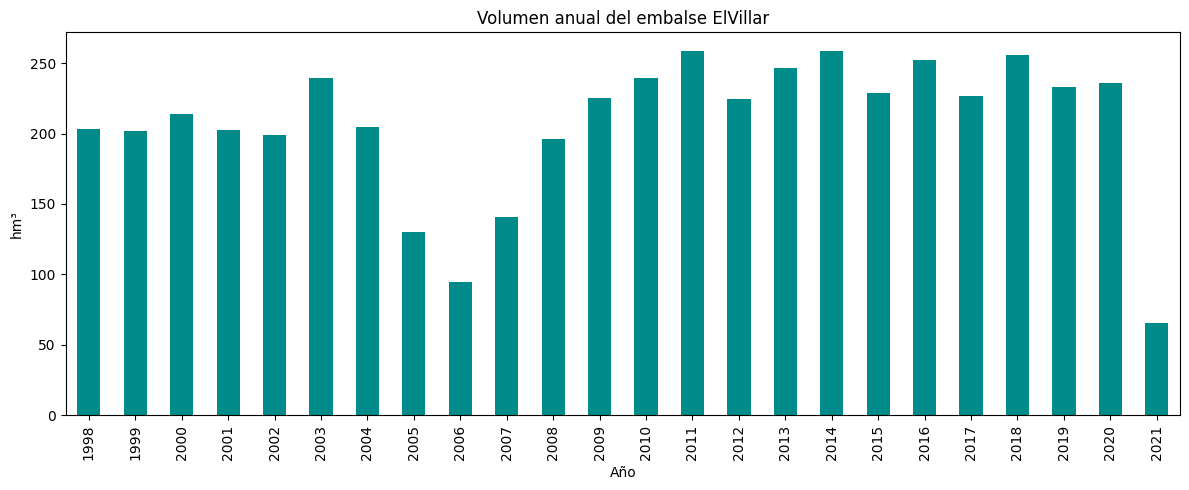

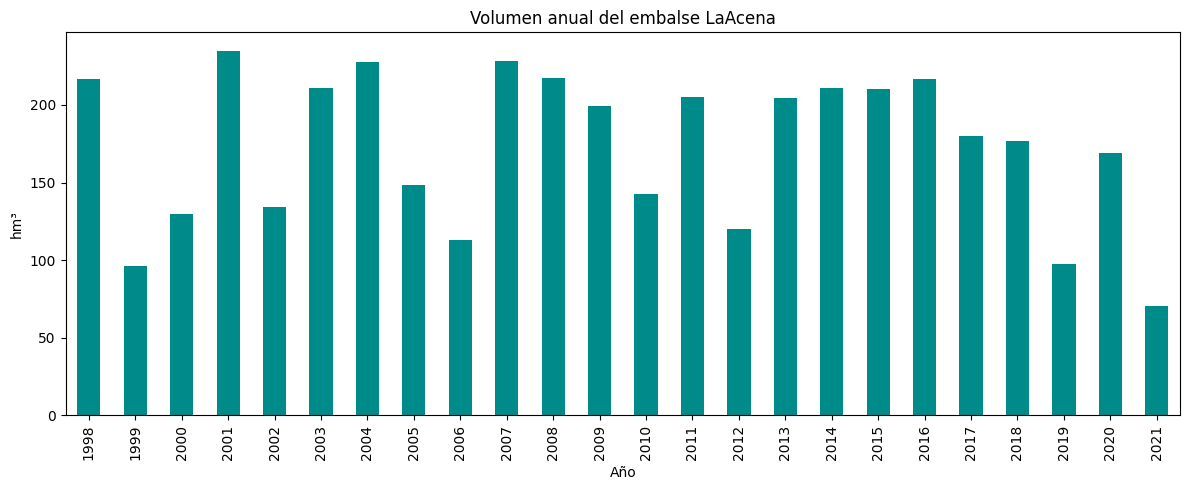

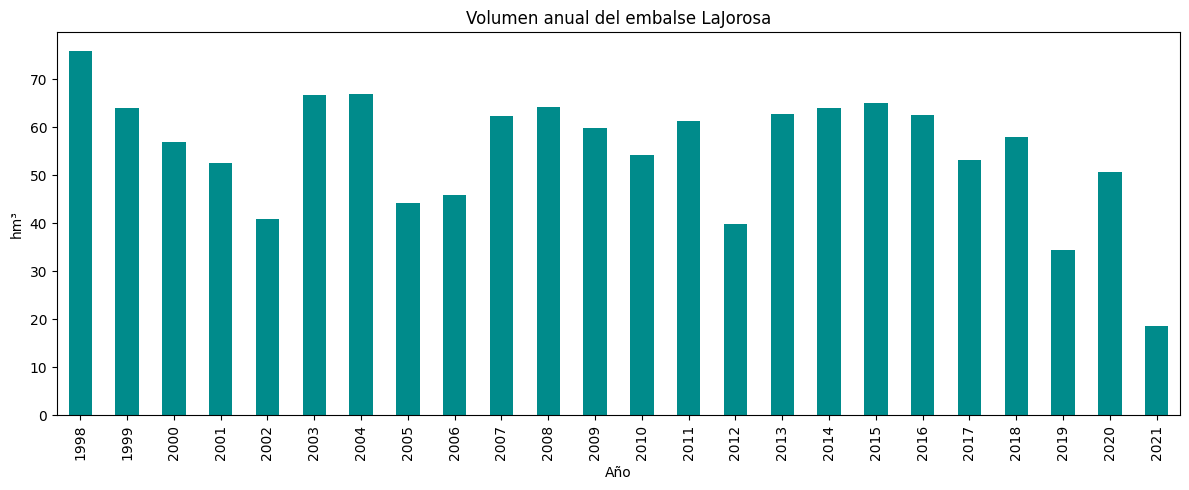

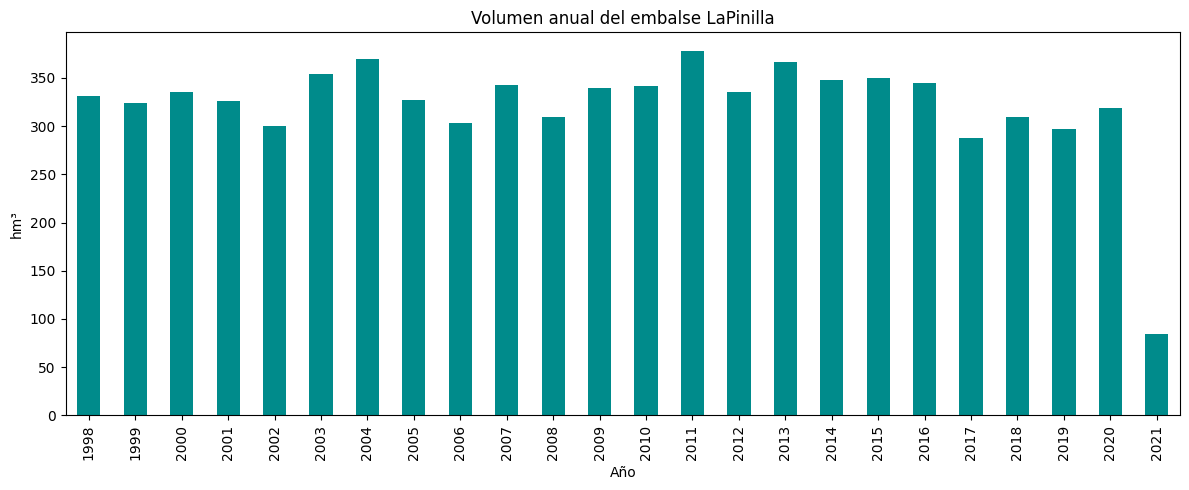

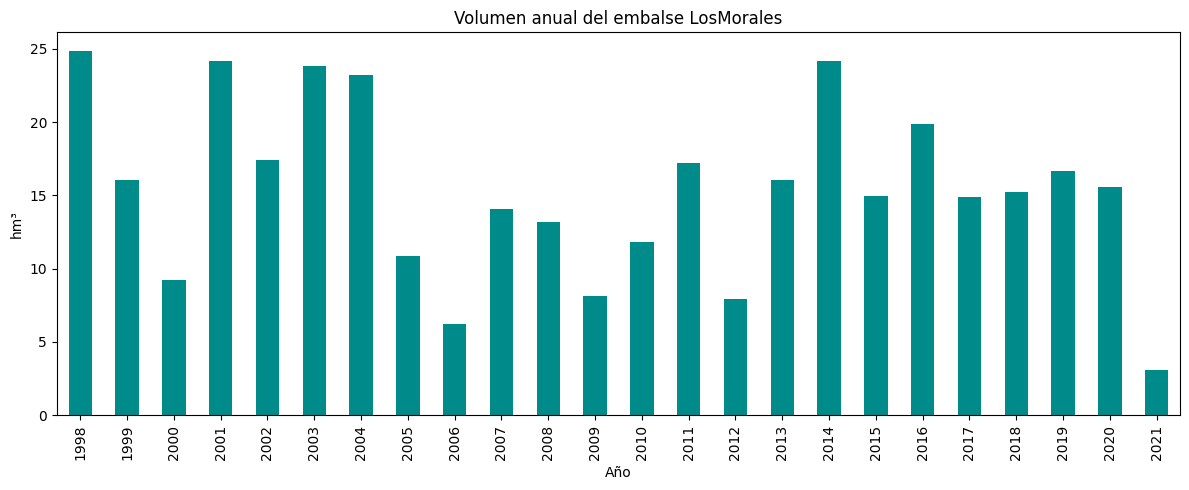

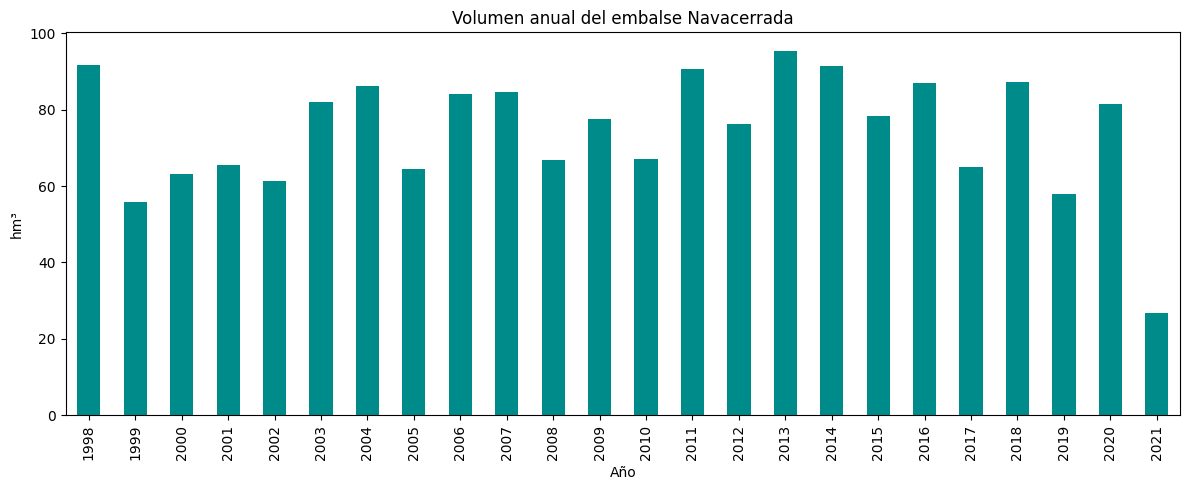

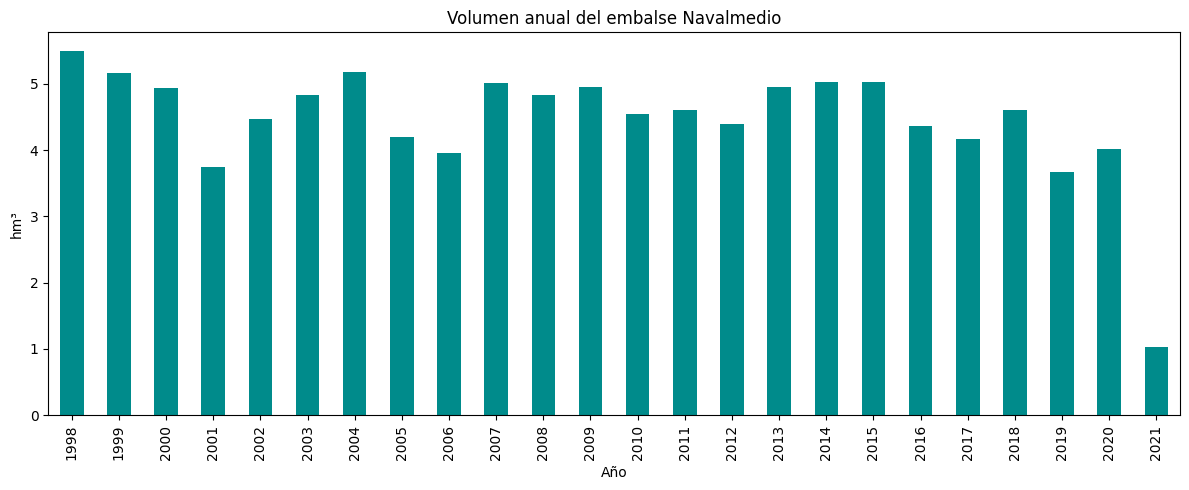

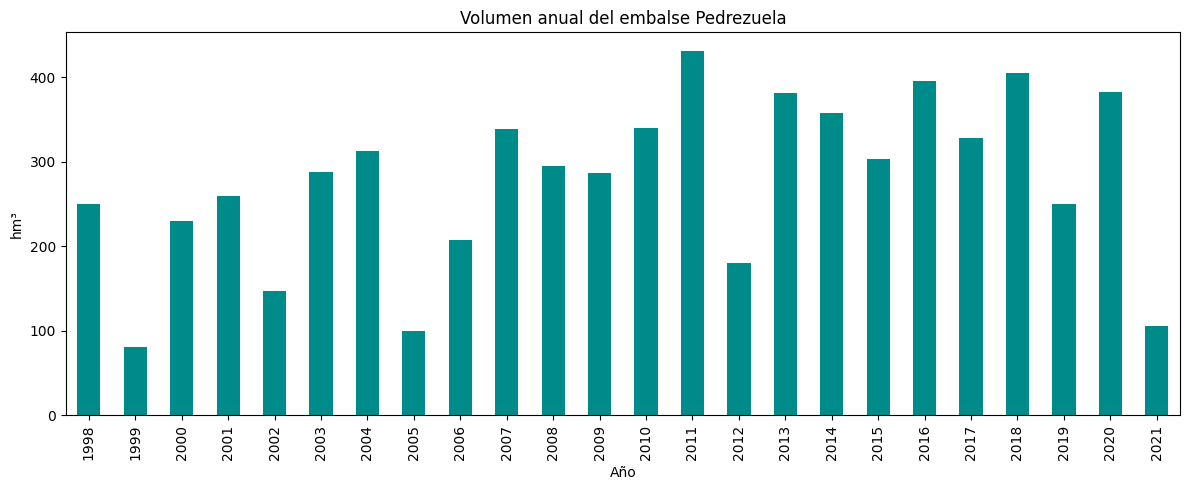

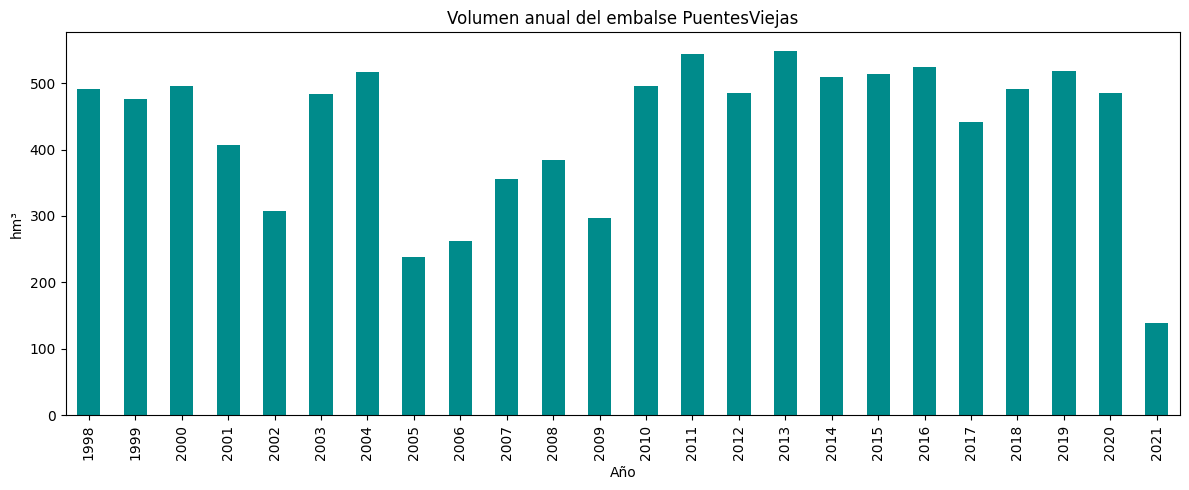

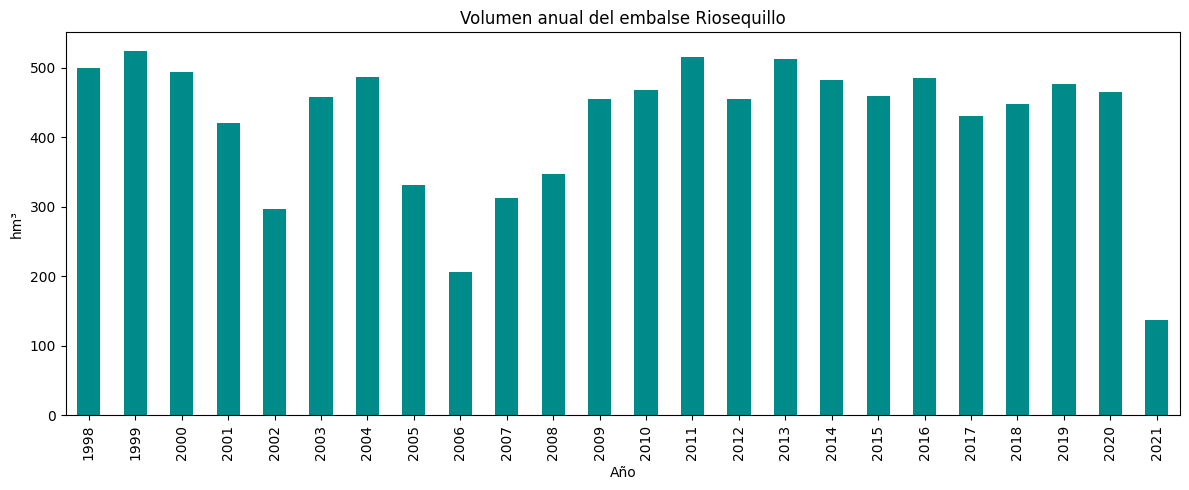

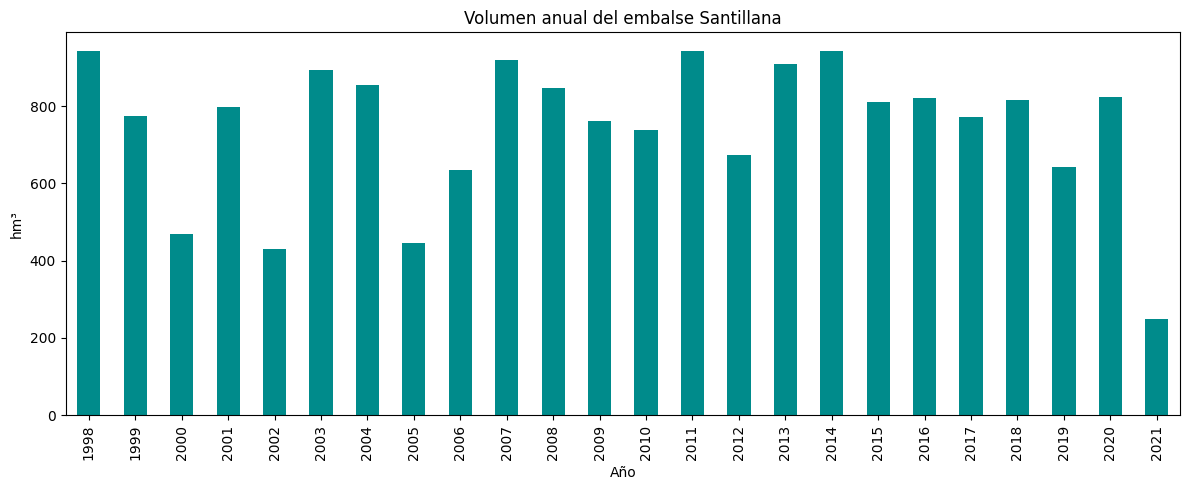

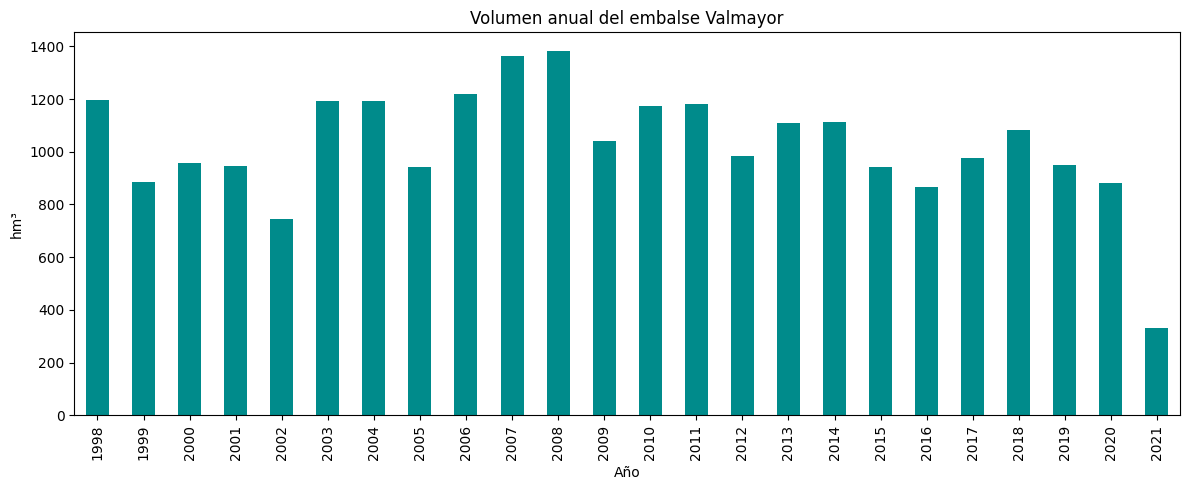

In [45]:
for embalse in columnas_embalses:
    plt.figure(figsize=(12, 5))

    df_pivotada_rellena.groupby("anio")[embalse].sum().plot(
        kind="bar", color="darkcyan"
    )

    plt.title(f"Volumen anual del embalse {embalse}")
    plt.xlabel("Año")
    plt.ylabel("hm³")
    plt.tight_layout()
    plt.show()


***Scatterplot: comparación de dos embalses***

Este gráfico, mediante una garfica de puntos, nos sirve para ver la dirección y relacion con el tiempo entre dos embalses, además, simplemente tu eliges los embalses que quieras en la aprte de codigo que esta claramente señalizada, ejemplo: ElAtazar vs Valmayor



```
embalse_a = "ElAtazar"
embalse_b = "Valmayor"
```



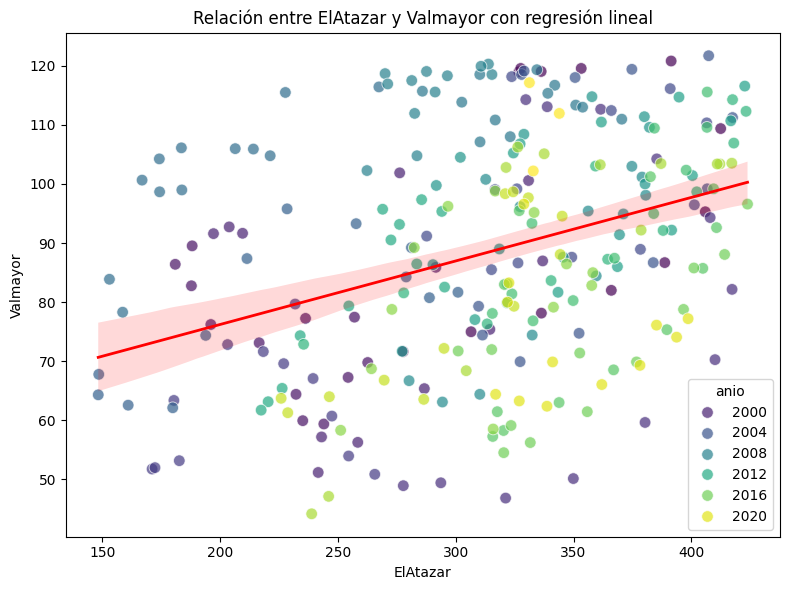

In [46]:
embalse_a = "ElAtazar"
embalse_b = "Valmayor"

plt.figure(figsize=(8, 6))

# Puntos
sns.scatterplot(
    data=df_pivotada,
    x=embalse_a,
    y=embalse_b,
    hue="anio",
    palette="viridis",
    alpha=0.7,
    s=70
)

# Línea de regresión lineal
sns.regplot(
    data=df_pivotada,
    x=embalse_a,
    y=embalse_b,
    scatter=False,       # No repetir los puntos
    color="red",         # Color de la recta
    line_kws={"linewidth": 2}
)

plt.title(f"Relación entre {embalse_a} y {embalse_b} con regresión lineal")
plt.xlabel(embalse_a)
plt.ylabel(embalse_b)
plt.tight_layout()
plt.show()



En este caso, vemos coo los puntos con menos tonalidades de azul, se acumulan mas en los valores mas pequeños, y cuanto el color va escalando a los verdes y amarillos, mas se disparan los puntos a posiciones con mayor valor de agua acumulada.

De hechola forma más forma de verlo, es gracias a la linea roja, la cual es la tendencia lineal de los puntos, la cual puede indicar una de esta tres cosas:

* Si es ascendente → ambos embalses se llenan y vacían paralelamente.
* Si es plana → apenas están correlacionados.
* Si es descendente → uno sube mientras el otro baja.

En este caso, se ve como claramente hay una correlacón entre ellos.

***Violin Plot por año: distribución del total de agua embalsada***

Este gráfico, es muy util, ya que nos ayuda a poder ver de firma más grafica el volumne y la acumulacion que ha habiado de agua por cada año, viendo así como claramente, sobretodo a partir de 2006, hubo un amunto de retención de agua en los embalses sin bajar a niveles historicos medios.

/tmp/ipython-input-1063654630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


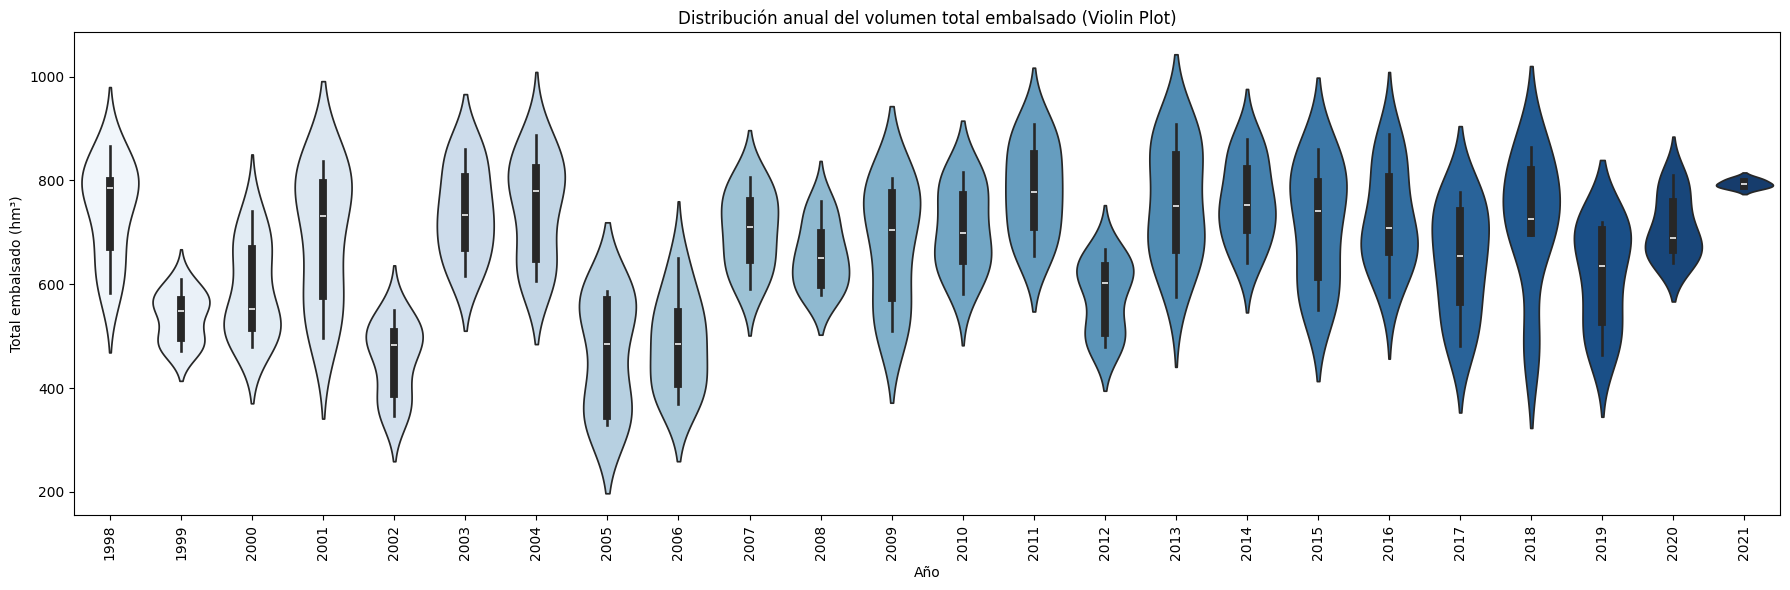

In [47]:
plt.figure(figsize=(18, 6))
sns.violinplot(
    data=df_pivotada_rellena,
    x="anio",
    y="total",
    palette="Blues"
)

plt.title("Distribución anual del volumen total embalsado (Violin Plot)")
plt.xlabel("Año")
plt.ylabel("Total embalsado (hm³)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Además, este gráfico muestra la “forma” de la distribución anual, señalando años con:

* Más variabilidad,

* Anomalías,

* Picos poco habituales.

***Violin Plot individual por embalse***

El gráfico de violín permite observar de forma clara la distribución histórica de los volúmenes embalsados en cada una de las presas

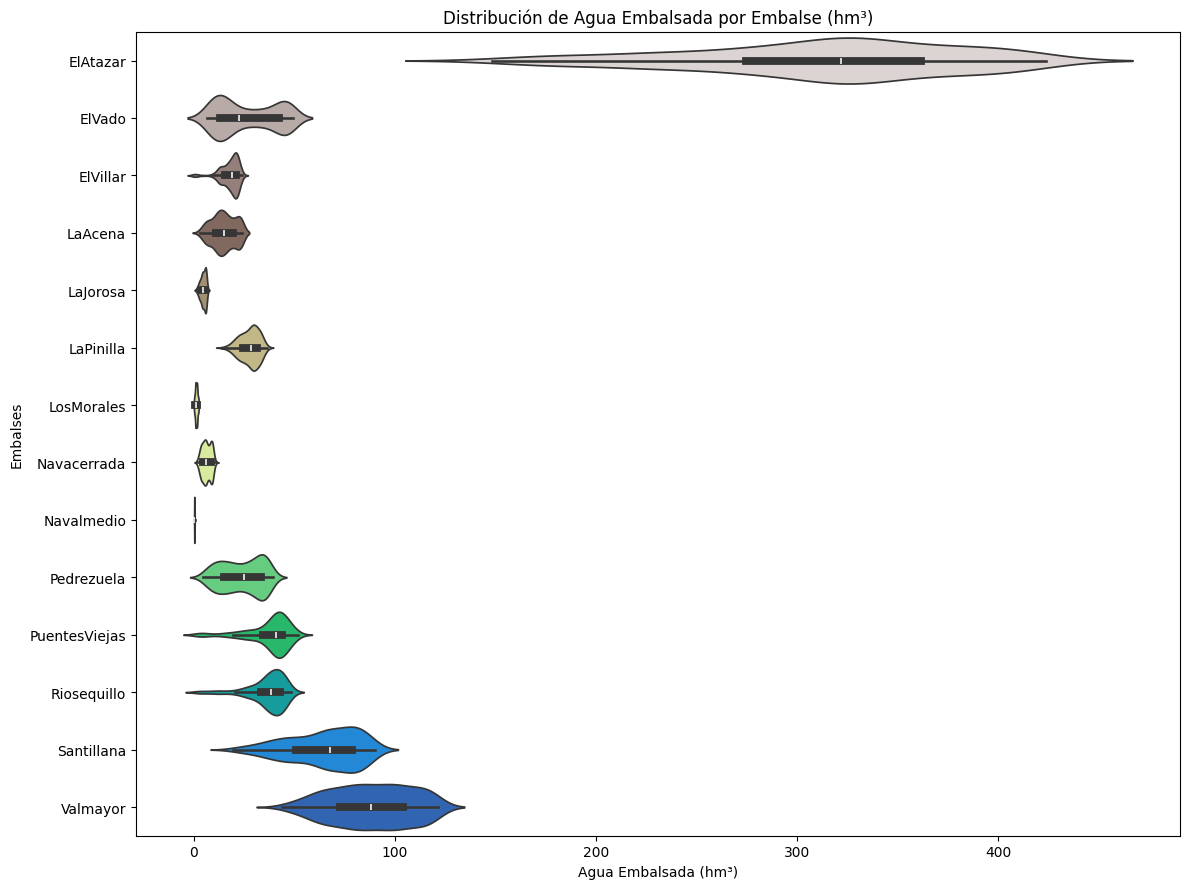

In [48]:

plt.figure(figsize=(12, 9))

sns.violinplot(
    data=df_pivotada_rellena[columnas_embalses],
    orient='h',                    # Horizontal
    palette="terrain_r"            # Igual que tu ejemplo
)

plt.title('Distribución de Agua Embalsada por Embalse (hm³)')
plt.xlabel('Agua Embalsada (hm³)')
plt.ylabel('Embalses')
plt.tight_layout()
plt.show()



Este gráfico, por su forma de verlo, muestra ***4 grupos*** principales, estructurados de la siguiente forma:

 **Grupo 1 — Embalses pequeños y muy estables**
    Navacerrada, Navalmedio, LosMorales, LaJorosa
    Presentan volúmenes muy bajos y distribuciones estrechas: apenas varían con el tiempo. Su impacto en el total es reducido.

**Grupo 2 — Embalses medianos con variabilidad moderada**

LaPinilla, Pedrezuela, LaAcena, ElVado, Riosequillo, PuentesViejas
Muestran más dispersión, con años de mínimos muy bajos y otros de mayor llenado. Variabilidad marcada por la estacionalidad.

**Grupo 3 — Embalses grandes y bastante variables**

Valmayor, Santillana
Registros amplios y dispersos: su capacidad mayor se refleja en curvas más extendidas y fluctuaciones anuales relevantes.

**Grupo 4 — El Atazar (caso excepcional)**

Embalse con diferencia más grande y variable del sistema. Su distribución es la más amplia, reflejando su papel dominante en el almacenamiento total.



## **Algoritmo de Prophet**

In [49]:

df_pivotada_rellena[["fecha", "total"]].head()

#df_pivotada
df_pivotada_rellena.tail(5)

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor,fecha,total
274,2020,11,322.594,26.556,20.421,15.596,4.354,22.477,0.898778,5.469,0.307,32.256,36.488,35.890,72.051,83.256,2020-11-01,677.715
275,2020,12,328.937,45.859,21.617,19.546,5.248,28.493,0.828556,8.305,0.321,33.851,44.619,38.857,80.703,96.598,2020-12-01,752.954
276,2021,1,332.906,48.117,23.600,23.477,5.805,29.557,0.825259,8.811,0.384,34.108,49.209,43.689,84.763,102.213,2021-01-01,786.639
277,2021,2,331.279,45.471,22.006,23.414,6.134,28.946,0.945630,8.859,0.351,34.477,44.222,47.479,82.427,117.166,2021-02-01,792.231
278,2021,3,343.976,47.740,19.540,23.731,6.630,26.288,1.287889,9.103,0.291,37.489,46.188,46.455,83.103,111.960,2021-03-01,802.494


In [50]:
# Guarda la versión actual del DataFrame
#df_pivotada_rellena.to_csv("df_embalses_medio_limpio.csv", index=False, encoding="utf-8")

#files.download("df_embalses_medio_limpio.csv")

In [51]:
df_pivotada_rellena.dtypes

,0
embalse,
anio,Int64
mes,Int64
ElAtazar,float64
ElVado,float64
ElVillar,float64
LaAcena,float64
LaJorosa,float64
LaPinilla,float64
LosMorales,float64


In [52]:
!pip uninstall -y prophet fbprophet cmdstanpy pystan



Found existing installation: prophet 1.2.1
Uninstalling prophet-1.2.1:
  Successfully uninstalled prophet-1.2.1
Found existing installation: cmdstanpy 1.3.0
Uninstalling cmdstanpy-1.3.0:
  Successfully uninstalled cmdstanpy-1.3.0


In [53]:
!pip install prophet cmdstanpy -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.0 MB/s eta 0:00:00


#### SUMA TOTAL MENSUAL de todos los embalses



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


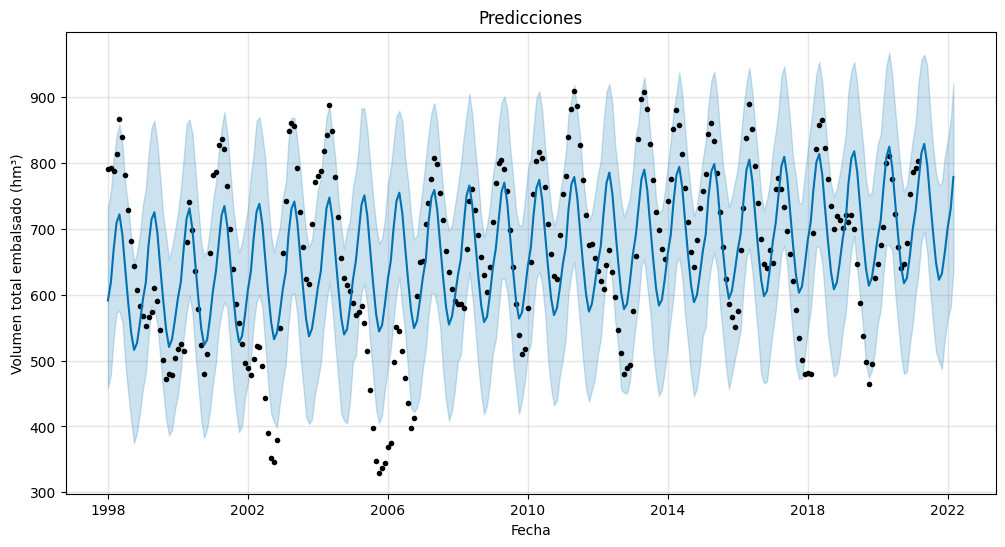

In [54]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Copiamos y adaptamos al formato que Prophet espera
df_anual_pred = df_pivotada_rellena[["fecha", "total"]].copy()
df_anual_pred = df_anual_pred.rename(columns={"fecha": "ds", "total": "y"})

# Por si acaso, orden temporal y limpieza
df_anual_pred = df_anual_pred.sort_values("ds").dropna(subset=["ds", "y"])

# Crear el modelo y ajustar los datos
model = Prophet()
model.fit(df_anual_pred)

# Fechas futuras: Predicción de 12 meses
future_dates = model.make_future_dataframe(periods=12, freq="MS")

predictions = model.predict(future_dates)

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(predictions, ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Volumen total embalsado (hm³)')
ax.set_title('Predicciones')
plt.show()


#### Cálculo de umbrales e identificación de la sequía para los próximos 12 meses

In [55]:

# Serie histórica de volumen total
y = df_anual_pred["y"]

umbral_bajo = np.percentile(y, 25)   # nivel bajo
umbral_sequia = np.percentile(y, 10) # sequía severa
media_historica = y.mean()

print("Umbral nivel bajo (p25):", umbral_bajo)
print("Umbral sequía severa (p10):", umbral_sequia)
print("Media histórica:", media_historica)

# Última fecha de la serie histórica
ultima_fecha_hist = df_anual_pred["ds"].max()

# Extraemos SOLO los próximos 12 meses respecto a esa fecha
pred_futuro = predictions[predictions["ds"] > ultima_fecha_hist][
    ["ds", "yhat", "yhat_lower", "yhat_upper"]
].copy()


# Clasificación de cada mes
def clasificar(valor):
    if valor < umbral_sequia:
        return "Sequía severa"
    elif valor < umbral_bajo:
        return "Nivel bajo"
    else:
        return "Normal"

pred_futuro["situacion"] = pred_futuro["yhat"].apply(clasificar)
pred_futuro


Umbral nivel bajo (p25): 574.816
Umbral sequía severa (p10): 488.9936
Media histórica: 662.9549354838708


,ds,yhat,yhat_lower,yhat_upper,situacion
279,2021-04-01,814.799552,680.163724,956.435762,Normal
280,2021-05-01,829.062269,696.414197,964.481847,Normal
281,2021-06-01,797.678588,664.732847,947.010502,Normal
282,2021-07-01,745.526997,607.499309,879.980466,Normal
283,2021-08-01,694.110844,556.927317,825.240192,Normal
284,2021-09-01,648.271682,512.669014,784.219699,Normal
285,2021-10-01,622.604593,498.823764,766.301753,Normal
286,2021-11-01,631.850572,486.789645,769.902194,Normal
287,2021-12-01,663.608047,532.360550,809.312922,Normal
288,2022-01-01,702.337104,564.356495,833.615024,Normal


Aquí, ya como podemos ver, el modelo nos dice que la predicción para lso proximos 12 meses es en todos los meses normal, comparando los umbrales ques e consideran de sequia y lso que el propio modelo obtiene de predicción real.

***Gráfico general: histórico + predicción + umbrales***

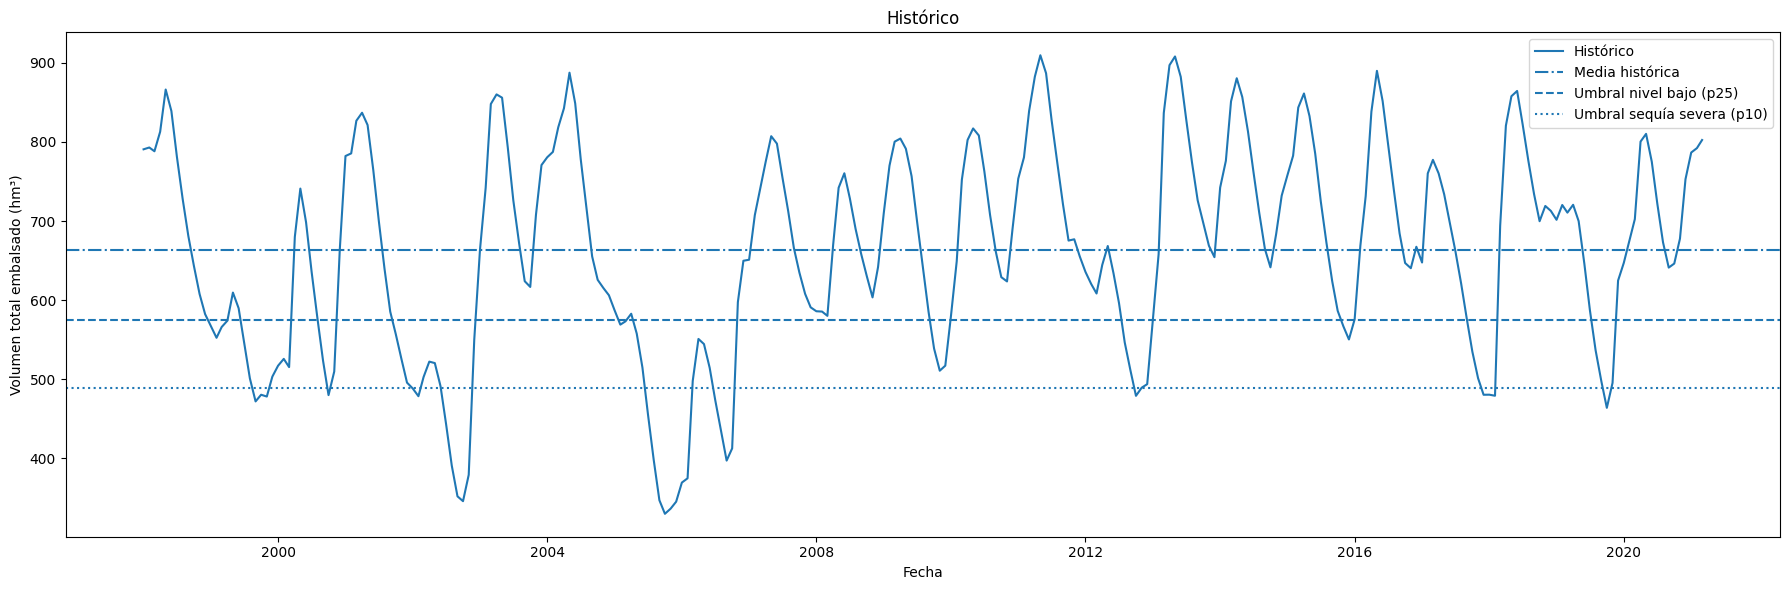

In [67]:

fig, ax = plt.subplots(figsize=(18, 6))

# Serie histórica
ax.plot(df_anual_pred["ds"], df_anual_pred["y"], label="Histórico")


# Umbrales horizontales
ax.axhline(media_historica, linestyle="-.", label="Media histórica")
ax.axhline(umbral_bajo, linestyle="--", label="Umbral nivel bajo (p25)")
ax.axhline(umbral_sequia, linestyle=":", label="Umbral sequía severa (p10)")

ax.set_xlabel("Fecha")
ax.set_ylabel("Volumen total embalsado (hm³)")
ax.set_title("Histórico")
ax.legend()
plt.tight_layout()
plt.show()

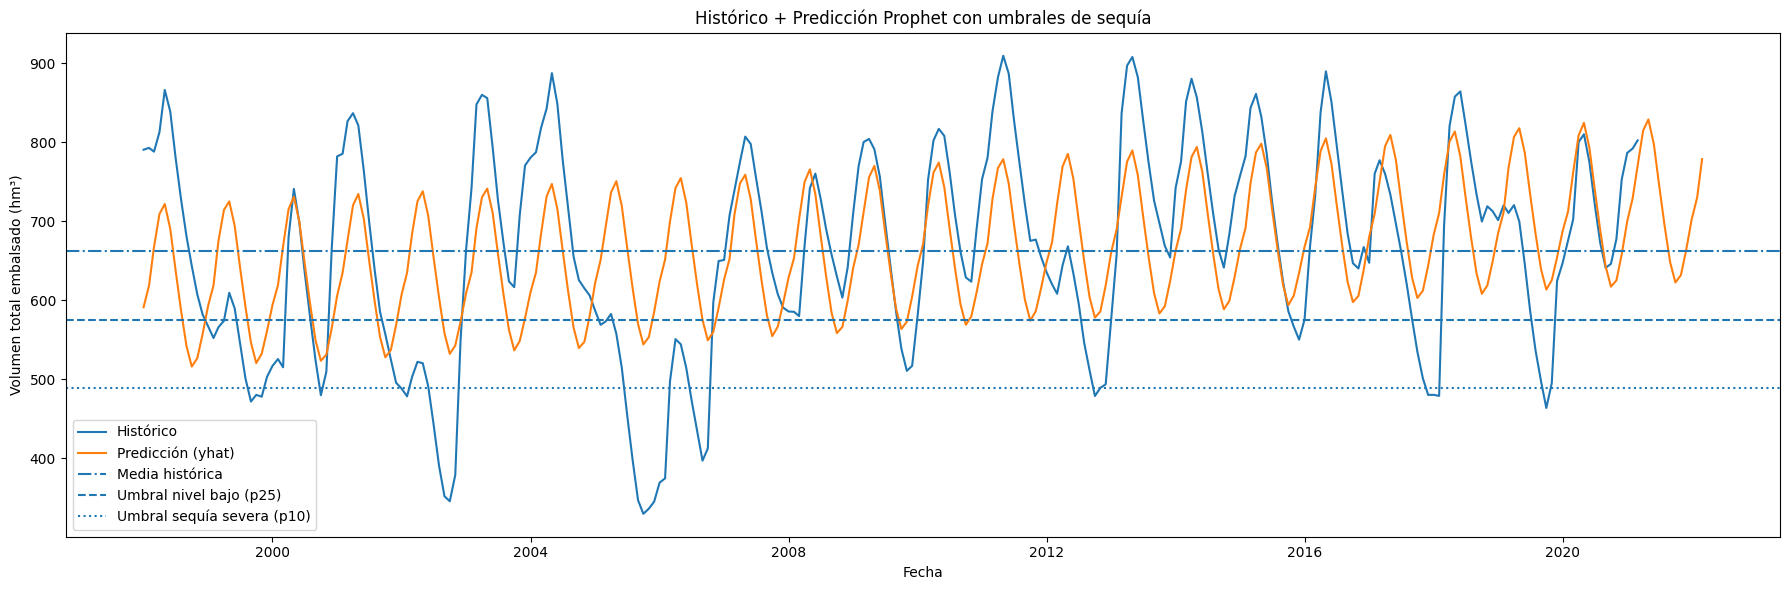

In [68]:

fig, ax = plt.subplots(figsize=(18, 6))

# Serie histórica
ax.plot(df_anual_pred["ds"], df_anual_pred["y"], label="Histórico")

# Predicción completa
ax.plot(predictions["ds"], predictions["yhat"], label="Predicción (yhat)")

# Umbrales horizontales
ax.axhline(media_historica, linestyle="-.", label="Media histórica")
ax.axhline(umbral_bajo, linestyle="--", label="Umbral nivel bajo (p25)")
ax.axhline(umbral_sequia, linestyle=":", label="Umbral sequía severa (p10)")

ax.set_xlabel("Fecha")
ax.set_ylabel("Volumen total embalsado (hm³)")
ax.set_title("Histórico + Predicción Prophet con umbrales de sequía")
ax.legend()
plt.tight_layout()
plt.show()


Este gráfico te deja ver si la predicción se mueve por encima o por debajo de los umbrales en el contexto de toda la serie. Es decir, te hace una comparacion de los umbrales de ***"sequia" / "niveles bajos de agua" y los umbrales esperados*** por la proyección Prophet. De esta forma solo viendo esto, ya queda claro que los niveles generales de agua han estado aumentando con el tiepo, por lo cual, aunque hubiera una época de poca agua en los próximos 12 meses, ya se puede ver, que su pico más bajo sería como un punto medio de hace 20 años, lo cual es otro indicativo más de que la predicción de antes en la que muestra que **no habrá sequía**, tiene sentido.

Aun así, si es cierto que esto no deja de ser la linea del algorithmo, y que en la realidad como vemos, los picos de bajada son superiores, pero de todos modos, al seguir en una media creciente de agua acumulada por embalse, hace que si solamente hubo una sequia severa por un mes, en esta predicción para los  próximos 12 meses, no habrá sequia en sí, simplemenete habra posibilidad de esta por un tiempo muy excaso, pero sin ser realmente perjudicial.

***Gráfico zoom solo 2022 (con banda de incertidumbre)***

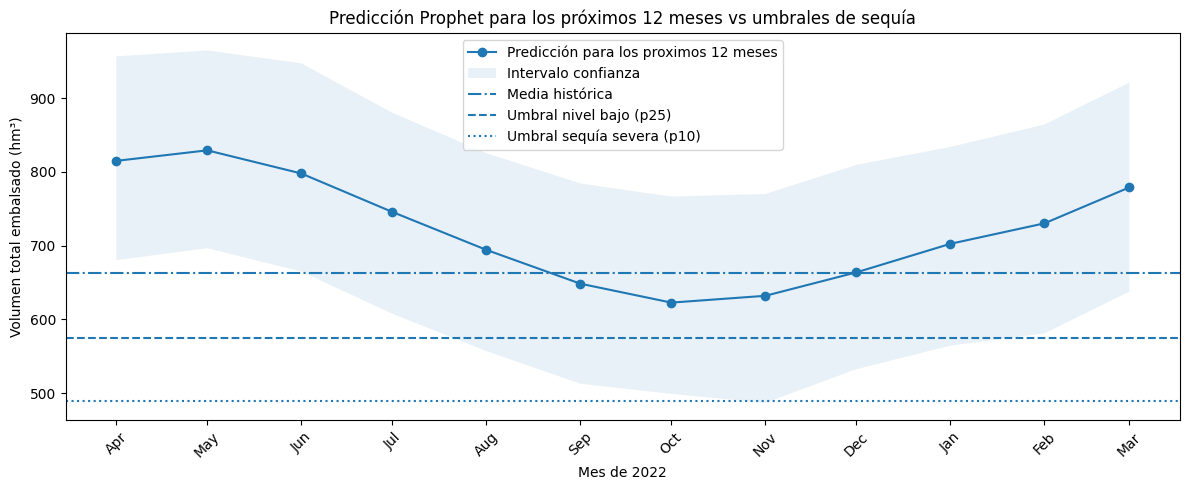

In [57]:
fig, ax = plt.subplots(figsize=(12, 5))

# Línea de predicción central
ax.plot(pred_futuro["ds"], pred_futuro["yhat"], marker="o", label="Predicción para los proximos 12 meses")

# Banda de incertidumbre
ax.fill_between(
    pred_futuro["ds"],
    pred_futuro["yhat_lower"],
    pred_futuro["yhat_upper"],
    alpha=0.1,
    label="Intervalo confianza"
)

# Umbrales
ax.axhline(media_historica, linestyle="-.", label="Media histórica")
ax.axhline(umbral_bajo, linestyle="--", label="Umbral nivel bajo (p25)")
ax.axhline(umbral_sequia, linestyle=":", label="Umbral sequía severa (p10)")

# Eje X más legible: meses abreviados
ax.set_xticks(pred_futuro["ds"])
ax.set_xticklabels(pred_futuro["ds"].dt.strftime("%b"), rotation=45)

ax.set_xlabel("Mes de 2022")
ax.set_ylabel("Volumen total embalsado (hm³)")
ax.set_title("Predicción Prophet para los próximos 12 meses vs umbrales de sequía")
ax.legend()
plt.tight_layout()
plt.show()


Aquí, como podemos ver, la proyección indica que como a lo largo del tiempo, ha estado aumentando la cantidad de agua de los embalses, la proyección esta por encima de la media historica en su mayoría del tiempo, por lo cual indica además que por el intervalo de confianza (Rango de confianza donde el modelo espera que se encuentren los datos reales), solo podría existir la posibilidad de una sequia severa para el mes de ***octubre / october,*** y así ciclicamente por las estaciones. Ya que claramente vemos por los otros gráficos, que sigue un patron de estacionalidad, dependiendo su cantidad de agua recaudada por las estaciones del año.

Aún así, es solo una pequeña probabilidad de sequía, ya que aunque el punto de proyección este a la mitad entre ***la media historica*** y ***elumbral de nivel bajo 25p***, sigue estando en una zona de poco riesgo de probabilidad de sequía, y como se ha mencionado antes, aunque el punto más bajo, el cual esta en el més de Octubre,  llegara a pasar al rango de seqúia, dandose el punto más aejado del intervalo de confianza, esta "Sequia" no duraría ni 15 días antes de volver a salir de ese umbral, por lo que es preciso decir, que generalmente, para los próximos *12 meses*, **NO** habrá Sequía, y si la hay, sera momentanea a principios del mes de Octubre.

# **Conclusión**


Tras el proceso completo de depuración, reconstrucción y análisis del dataset hidrográfico —incluyendo la normalización de valores, la imputación controlada de las series incompletas y la consolidación de la tabla pivoteada, la conclusión final es que ***NO habrá sequía*** en lso próximos **12 meses**, esta conclusión esta sacada debido a lo siguiente:

Una vez entrenado el modelo Prophet con esta serie histórica, se generó la predicción de los próximos **12 meses**. La evaluación de estas predicciones se realizó comparándolas con tres referencias estadísticas derivadas del histórico:

* **Media histórica del volumen total embalsado**,

* **Percentil 25**, definido como umbral de “nivel bajo”,

* **Percentil 10**, considerado umbral de “sequía severa”.

En los resultados obtenidos, la serie pronosticada:

1. **Permanece consistentemente por encima del percentil 25**

2. **No se aproxima a los valores del percentil 10 en ningún momento del horizonte temporal**

3. **Se alinea con el patrón estacional típico** de los últimos años del registro histórico

4. Y presenta un **comportamiento suave**, sin caídas bruscas ni anomalías que sugieran riesgo de escasez crítica.

Estos indicadores permiten concluir de manera fundamentada que, según el modelo y los datos disponibles, no se anticipa un escenario de sequía para los próximos **12 meses.**
Las predicciones muestran un volumen embalsado dentro de la normalidad histórica, sin señales de alerta que puedan interpretarse como una entrada en fase de déficit hídrico severo.

En definitiva, todo este análisis afirma que la evolución esperada del sistema de embalses de Madrid se mantiene estable, y que, bajo las condiciones actuales, ***la probabilidad de sequía en el corto plazo (12 meses) es baja.***

In [58]:
df_pivotada_rellena

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor,fecha,total
0,1998,1,326.784,45.882,22.741,23.891,6.572,30.331,2.373000,10.062,0.182,38.413,41.769,45.782,76.953,118.990,1998-01-01,790.725
1,1998,2,327.590,46.043,21.550,23.816,6.462,30.254,2.370000,10.114,0.617,38.104,41.442,46.640,78.440,119.578,1998-02-01,793.020
2,1998,3,336.267,39.928,21.670,23.245,6.848,30.020,2.363000,9.966,0.500,33.449,40.911,45.965,78.067,119.063,1998-03-01,788.262
3,1998,4,353.267,42.443,21.644,23.350,6.747,31.674,2.363000,10.326,0.639,27.848,44.173,46.209,82.716,119.578,1998-04-01,812.977
4,1998,5,391.448,49.165,21.925,23.678,7.041,35.518,2.338000,10.989,0.625,23.009,50.395,43.954,85.453,120.833,1998-05-01,866.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020,11,322.594,26.556,20.421,15.596,4.354,22.477,0.898778,5.469,0.307,32.256,36.488,35.890,72.051,83.256,2020-11-01,677.715
275,2020,12,328.937,45.859,21.617,19.546,5.248,28.493,0.828556,8.305,0.321,33.851,44.619,38.857,80.703,96.598,2020-12-01,752.954
276,2021,1,332.906,48.117,23.600,23.477,5.805,29.557,0.825259,8.811,0.384,34.108,49.209,43.689,84.763,102.213,2021-01-01,786.639
277,2021,2,331.279,45.471,22.006,23.414,6.134,28.946,0.945630,8.859,0.351,34.477,44.222,47.479,82.427,117.166,2021-02-01,792.231


# Power BI

## Justificación

## Preparación de datos para Power BI

In [59]:
# Identificar columnas de embalses (todas menos estas)
columnas_embalses = [
    c for c in df_pivotada_rellena.columns
    if c not in ["anio", "mes", "fecha", "total"]
]

In [60]:
df_powerbi = df_pivotada_rellena.melt(
    id_vars=["anio", "mes", "fecha"],
    value_vars=columnas_embalses,
    var_name="embalse",
    value_name="volumen"
)
# Por si hubiera algún NaN residual en volumen, lo eliminamos o ponemos 0:
df_powerbi["volumen"] = pd.to_numeric(df_powerbi["volumen"], errors="coerce")
# Opcional: si prefieres eliminar filas con NaN en volumen:
df_powerbi = df_powerbi.dropna(subset=["volumen"])
# (Si prefieres poner 0 en vez de drop, usa: df_powerbi["volumen"] = df_powerbi["volumen"].fillna(0))
df_powerbi


,anio,mes,fecha,embalse,volumen
0,1998,1,1998-01-01,ElAtazar,326.784
1,1998,2,1998-02-01,ElAtazar,327.590
2,1998,3,1998-03-01,ElAtazar,336.267
3,1998,4,1998-04-01,ElAtazar,353.267
4,1998,5,1998-05-01,ElAtazar,391.448
...,...,...,...,...,...
3901,2020,11,2020-11-01,Valmayor,83.256
3902,2020,12,2020-12-01,Valmayor,96.598
3903,2021,1,2021-01-01,Valmayor,102.213
3904,2021,2,2021-02-01,Valmayor,117.166


In [61]:
coords = {
    "ElAtazar":      (40.9219, -3.5387),
    "Valmayor":      (40.5850, -4.0367),
    "ElVado":        (41.0244, -3.3093),
    "LaPinilla":     (41.1454, -3.5367),
    "Navacerrada":   (40.7348, -3.9708),
    "LaJorosa":      (40.7238, -4.1658),
    "LosMorales":    (40.8840, -3.8710),
    "LaAcena":       (41.0630, -3.5212),
    "Santillana":    (40.7340, -3.8461),
    "Pedrezuela":    (40.7604, -3.6046),
    "PuentesViejas": (40.9981, -3.5384),
    "Riosequillo":   (40.9088, -3.6929),
    "Navalmedio":    (40.7658, -4.0395),
    "ElVillar":      (40.9133, -3.5401)
}

df_powerbi["latitud"]  = df_powerbi["embalse"].apply(lambda x: coords[x][0])
df_powerbi["longitud"] = df_powerbi["embalse"].apply(lambda x: coords[x][1])


In [62]:

df_powerbi.to_csv(
    "embalses_powerbi_long.csv",
    index=False,
    sep=";",       # separador de columnas tipo España
    decimal=","    # separador decimal español
)


Hice esta transformación por comodidad personal, y sin embargo me resulto problemática en Power BI, ya que al cambiar a una que "No" es la estandart, me hizo tener que realizar una transformación de datos en el propio Power BI

In [63]:
df_powerbi

,anio,mes,fecha,embalse,volumen,latitud,longitud
0,1998,1,1998-01-01,ElAtazar,326.784,40.9219,-3.5387
1,1998,2,1998-02-01,ElAtazar,327.590,40.9219,-3.5387
2,1998,3,1998-03-01,ElAtazar,336.267,40.9219,-3.5387
3,1998,4,1998-04-01,ElAtazar,353.267,40.9219,-3.5387
4,1998,5,1998-05-01,ElAtazar,391.448,40.9219,-3.5387
...,...,...,...,...,...,...,...
3901,2020,11,2020-11-01,Valmayor,83.256,40.5850,-4.0367
3902,2020,12,2020-12-01,Valmayor,96.598,40.5850,-4.0367
3903,2021,1,2021-01-01,Valmayor,102.213,40.5850,-4.0367
3904,2021,2,2021-02-01,Valmayor,117.166,40.5850,-4.0367


In [64]:
df_powerbi.dtypes

,0
anio,Int64
mes,Int64
fecha,datetime64[ns]
embalse,object
volumen,float64
latitud,float64
longitud,float64


In [65]:
df_powerbi.to_csv("embalses_powerbi_long.csv", index=False)

from google.colab import files
files.download("embalses_powerbi_long.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>